# Set up jupyter notebook

In [514]:
# Importing necessary libaries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Connecting Python with SQL

import pymysql
from sqlalchemy import create_engine

import getpass  # To get the password without showing the input
password = getpass.getpass()

connection_string = 'mysql+pymysql://root:' + password + '@localhost/CCCC'
engine = create_engine(connection_string)

········


# Case Study: Credit Card Bank

Objective: The task is to build a model that will provide insight into why some bank customers accept credit card offers. There are also other potential areas of opportunities that the bank wants to understand from the data. Your senior management has also posted these other questions that will help them better understand their customers.

Data: The data set consists of information on 18,000 current bank customers in the study. These are the definitions of data points provided:

Customer Number: A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).

Offer Accepted: Did the customer accept (Yes) or reject (No) the offer. Reward: The type of reward program offered for the card.

Mailer Type: Letter or postcard.

Income Level: Low, Medium or High.

Bank Accounts Open: How many non-credit-card accounts are held by the customer.

Overdraft Protection: Does the customer have overdraft protection on their checking account(s) (Yes or No).

Credit Rating: Low, Medium or High.

Credit Cards Held: The number of credit cards held at the bank.

Homes Owned: The number of homes owned by the customer.

Household Size: Number of individuals in the family.

Own Your Home: Does the customer own their home? (Yes or No).

Average Balance: Average account balance (across all accounts over time). Q1, Q2, Q3 and Q4

Balance: Average balance for each quarter in the last year


# Documentation of variables

### DF

- df: raw_data w/o NAN

- categoricals

- numericals

df numericals was splitted into:
- discrete
- continuous


### Functions

- data_des(data); return empty = will print information about the df passed

- converter(data); return Categoricals,DiscreteValues,ContinuousValues = will converter data into three df with: *Categoricals,DiscreteValues,ContinuousValues=converter(data)*

Functions for plotting the data:
- countplot_df(categoricals)
- countplot_df(discrete)
- distplot_df(continuous)
- boxplot_num(continuous)


- corr_matrix_df(df); return empty = function for printing correlation matrix for numericals (not dummies & ordinals)

- skew_df(df); return empty = Prints the skew for the continuous variables


- Autofeature(X,Y,scaler=StandardScaler(),model()=RandomForestClassifier()) = return empty

- balance (X_train_scaled, Y, sampler), return X_s, y_s = automated balancing function, can be called more than once, sampler=str

# 1. Importing data from CSV-file

In this jupyter notebook the data will be imported from 'creditcardmarketing.csv'. 

For SQL import we updated the file to 'creditcardmarketing1.csv' due to some issues in SQL reffering the format of the rows. 

In [3]:
#Standardizing column names
column_names = ['Customer Id', 'Offer Accepted', 'reward', 'Mailer Type', 
'Income Level',
'N Bank Accounts Open',
'Overdraft Protection',
'Credit Rating',
'N Credit Cards Held',
'N Homes Owned',
'Household Size',
'Own Your Home',
'Average Balance',
'Q1 Balance',
'Q2 Balance',
'Q3 Balance',
'Q4 Balance',]
for i in range(len(column_names)):
    column_names[i] = column_names[i].lower()
    column_names[i] = column_names[i].replace(' ', '_')

#Improting raw data    
raw_data = pd.read_csv('creditcardmarketing.csv')
data = raw_data
row1 = [1, 'No', 'Air Miles', 'Letter', 'High', 1, 'No', 'High', 2,
       1, 4, 'No', 1160.75, 1669, 877, 1095, 1002]
row1_df = pd.DataFrame(row1)
row1_df = row1_df.T
row1_df.columns = data.columns
df1 = pd.concat([row1_df, data], axis = 0)

#df = raw data with customer_id as an index
df=df1
df.columns = column_names
df = df.set_index('customer_id')

# 2. Data Exploration

In [98]:
#Function for describing data
def data_des(data):
    print("DF shape")
    print(data.shape)
    
    print("________________________________")
    print("DF info")
    print(data.info())
    
    print("________________________________")
    print("DF describe")
    print(data.describe())
    
    print("________________________________")
    print("Sum isnull()")
    print(data.isnull().sum())
    
    print("________________________________")
    print("Sum isna()")
    print(data.isna().sum())
    
    print("________________________________")
    print("Sum eq(' ')")
    print(data.eq(' ').sum())
    
    print("________________________________")
    print("Sum eq('')")
    print(data.eq('').sum())

#Calling the function for df      
data_des(df)

DF shape
(17976, 16)
________________________________
DF info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 1 to 18000
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17976 non-null  object 
 1   reward                17976 non-null  object 
 2   mailer_type           17976 non-null  object 
 3   income_level          17976 non-null  object 
 4   n_bank_accounts_open  17976 non-null  int64  
 5   overdraft_protection  17976 non-null  object 
 6   credit_rating         17976 non-null  object 
 7   n_credit_cards_held   17976 non-null  int64  
 8   n_homes_owned         17976 non-null  int64  
 9   household_size        17976 non-null  int64  
 10  own_your_home         17976 non-null  object 
 11  average_balance       17976 non-null  float64
 12  q1_balance            17976 non-null  int64  
 13  q2_balance            17976 non-null  int64  
 14  q3_balan

# 2.1 Identify rows with na/null values

In [7]:
#index-list of nas & dropping
lst=list(df[df.isna().any(axis=1)].index)
df.drop(lst,axis=0,inplace=True)

In [598]:
df["offer_accepted"].value_counts()

No     16955
Yes     1021
Name: offer_accepted, dtype: int64

**DECISION**: To drop nas, we identify them in SQL as well. 

# 2.2 Splitting numericals (Discrete & Continuous), categoricals

Right now all columns are np.objects, has to be changed to numericals & categoricals before applying the converter function.

In [79]:
#Applying manually the data type
num=['n_bank_accounts_open', 'n_credit_cards_held', 'n_homes_owned',
       'household_size', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance','q4_balance']

for i in num:
    df[i] = pd.to_numeric(df[i],errors="coerce")
    
numericals=df.select_dtypes(np.number)

In [80]:
#data_des(df)
#data_des(numericals)

In [217]:
#Function for converting numericals into discrete & continuous
def converter(data,value=200):
    Categoricals=data.select_dtypes("object")
    numbers=data.select_dtypes(np.number)
    numbernames=numbers.columns
    continuous=[]
    discrete= []
    for i in numbernames:
        if len(data[i].unique()) > value:
            continuous.append(i)
        else:
            discrete.append(i)
    DiscreteValues=data[discrete]
    ContinuousValues=data[continuous]
    return Categoricals,DiscreteValues,ContinuousValues

#Categoricals,DiscreteValues,ContinuousValues=converter(data)

In [82]:
categoricals,discrete,continuous=converter(df)

# 2.3 Plotting data

In [83]:
#def functions for plotting

#displot for continuous
def distplot_df(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cols=list(df.columns)
    
    for col in cols:
        print(col)
        sns.distplot(df[col])
        plt.show()

#boxplot for continuous
def boxplot_num(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cols=list(df.columns)
    
    for col in cols:
        sns.boxplot(y=col, data=df)
        plt.show()

#countplot for discrete & categoricals
def countplot_df(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    for col in list(df.columns):
        plt.figure(figsize=(10,5))
        sns.countplot(x=col, data=df)
        plt.show()

CATEGORICAL FEATURES


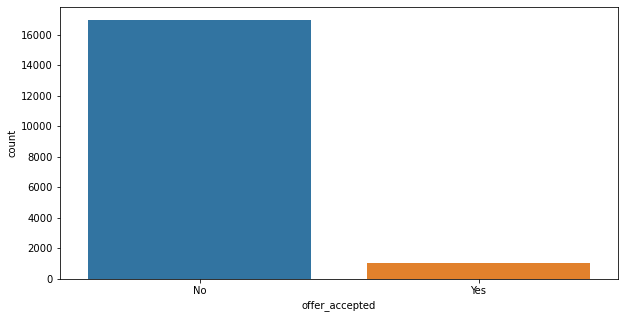

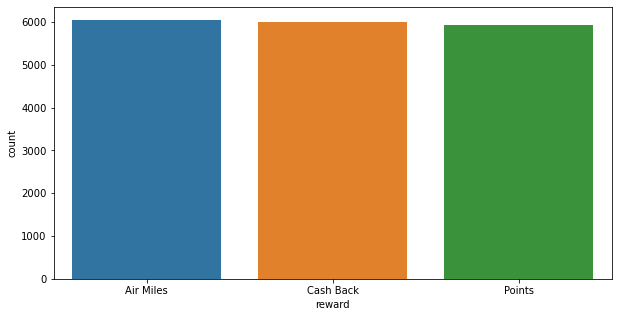

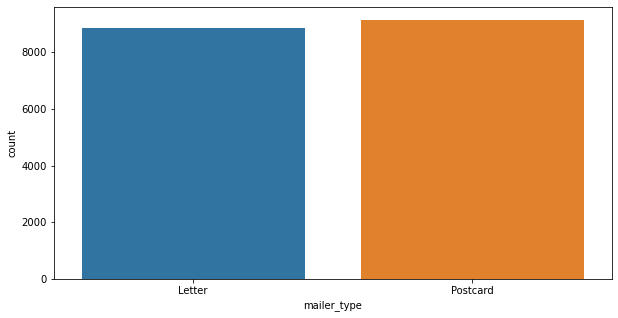

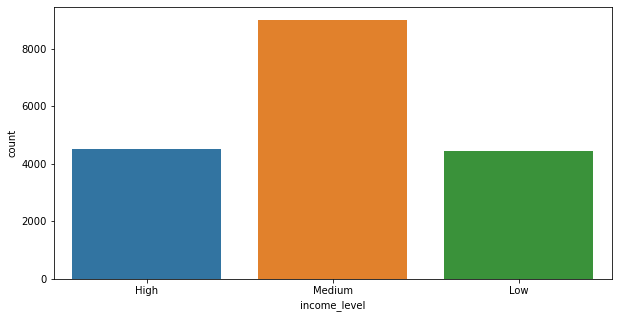

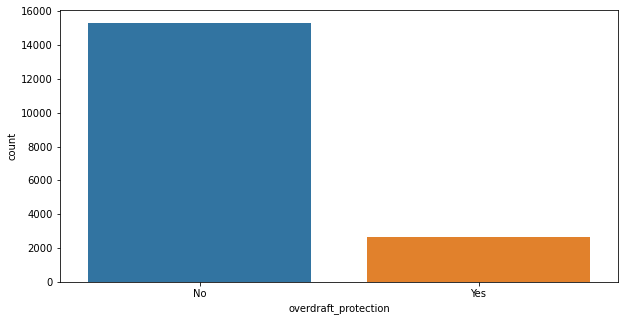

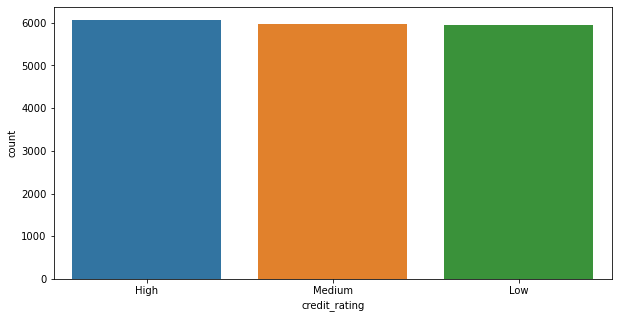

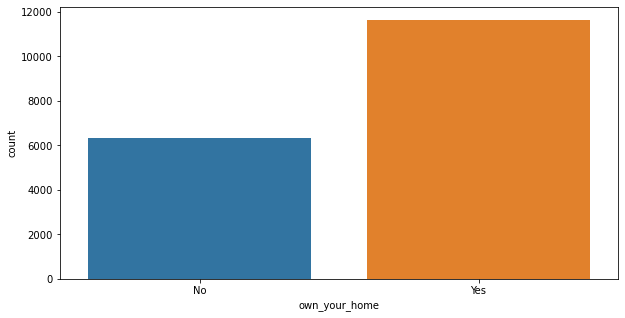

DISCRETE FEATURES


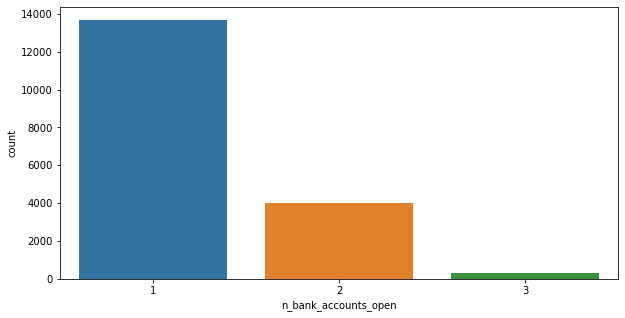

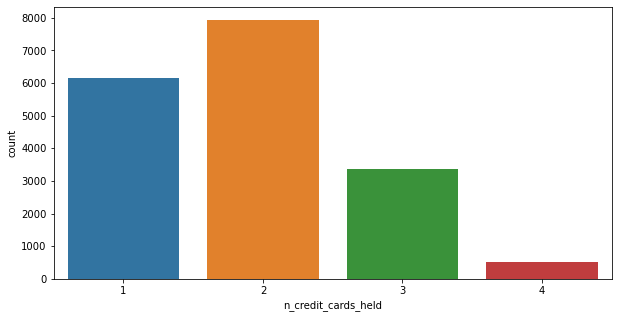

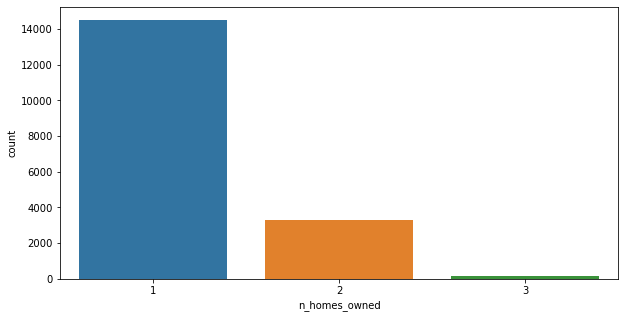

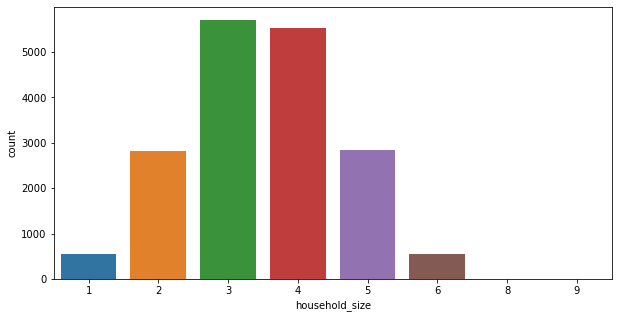

In [84]:
print("CATEGORICAL FEATURES")
countplot_df(categoricals)
print("DISCRETE FEATURES")
countplot_df(discrete)


average_balance


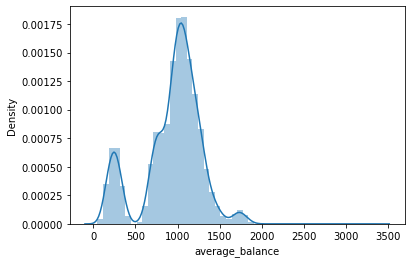

q1_balance


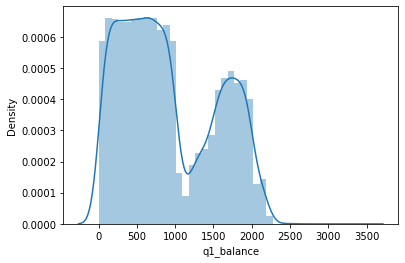

q2_balance


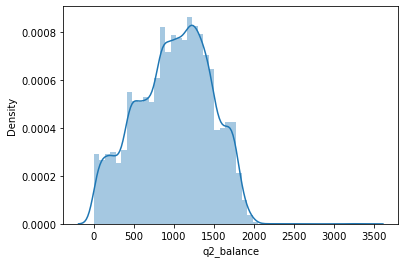

q3_balance


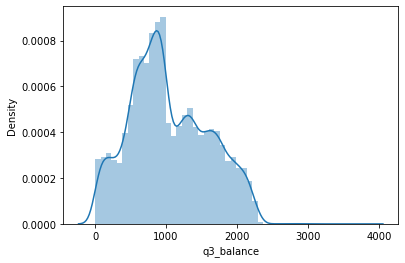

q4_balance


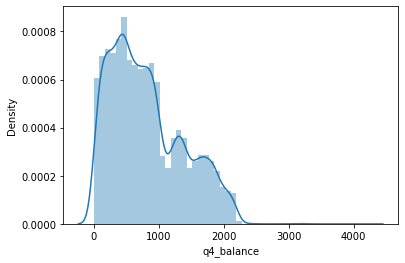

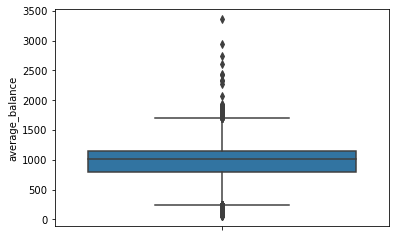

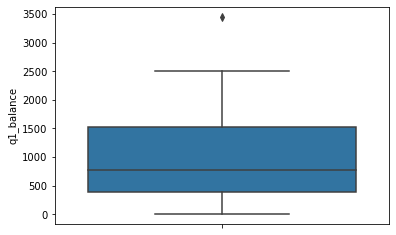

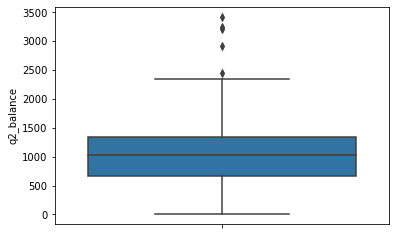

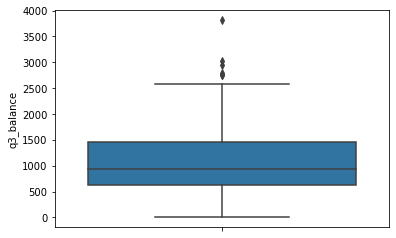

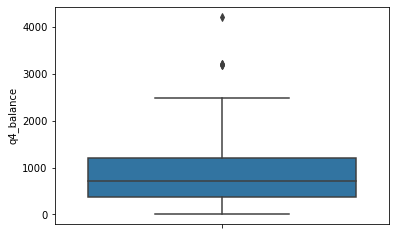

In [85]:
distplot_df(continuous)
boxplot_num(continuous)

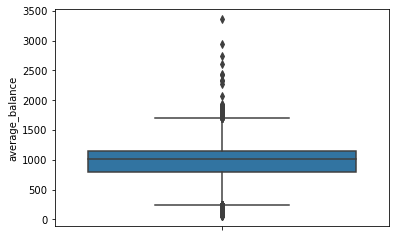

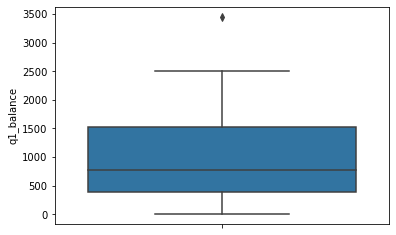

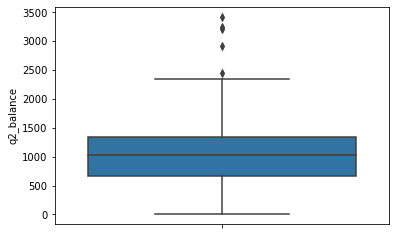

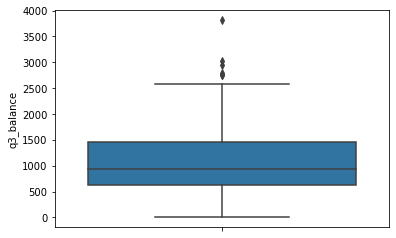

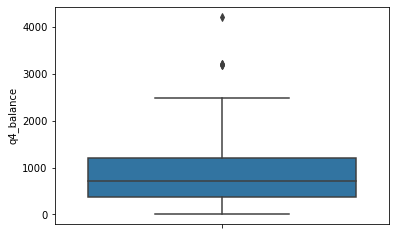

In [86]:
boxplot_num(continuous)

CATEGORICAL FEATURES


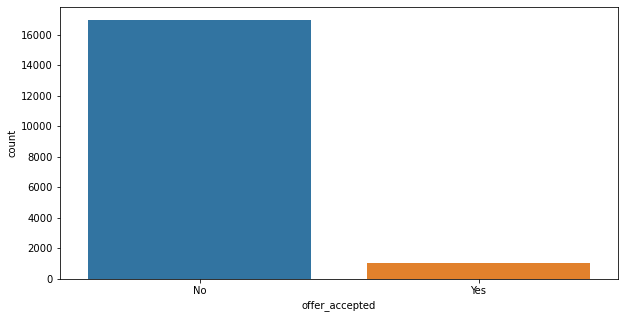

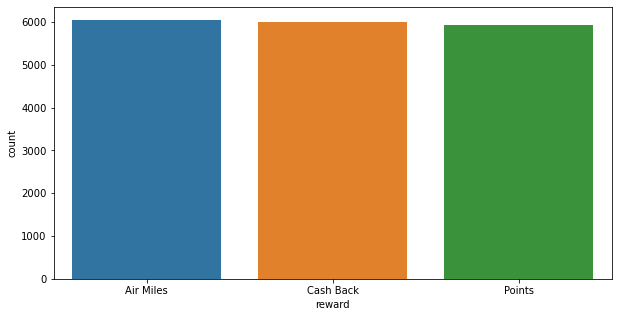

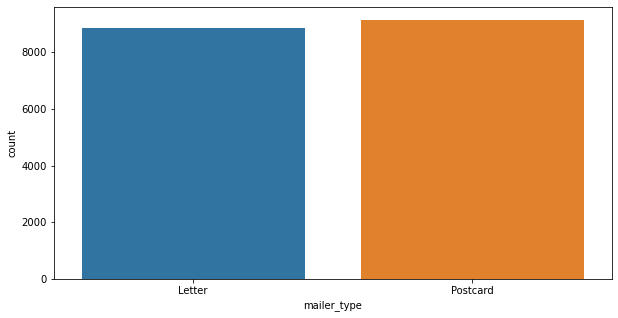

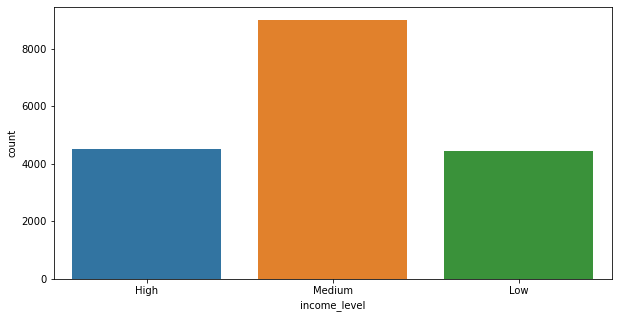

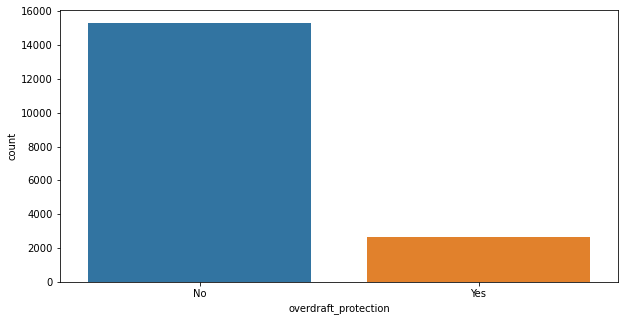

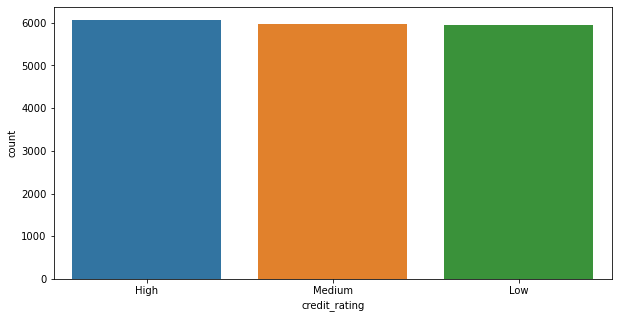

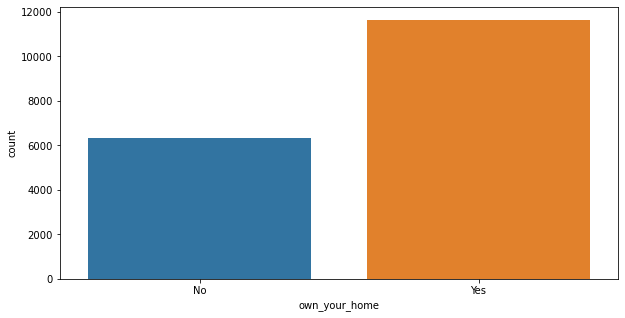

DISCRETE FEATURES


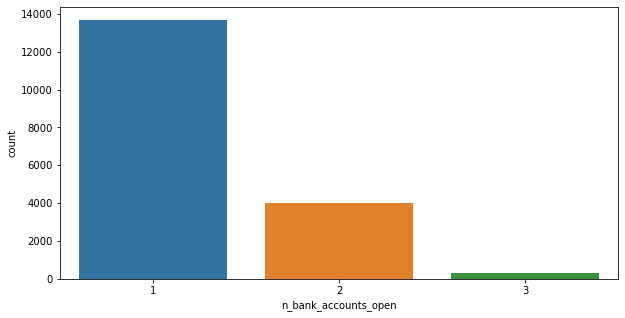

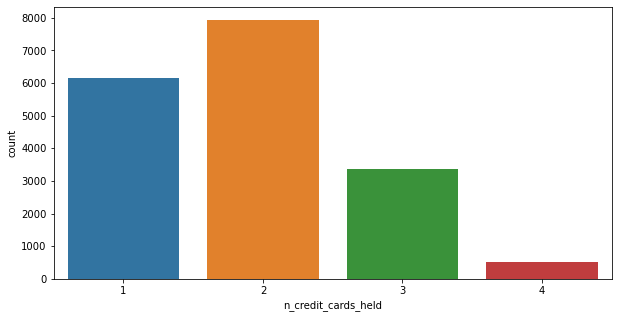

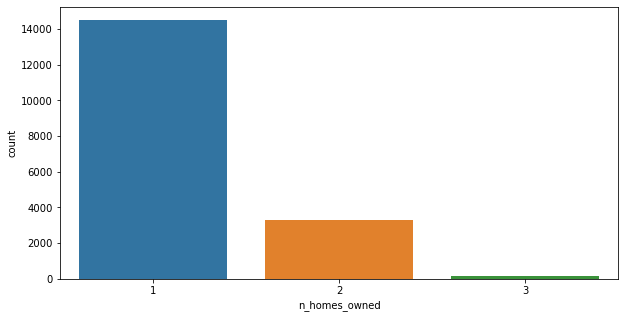

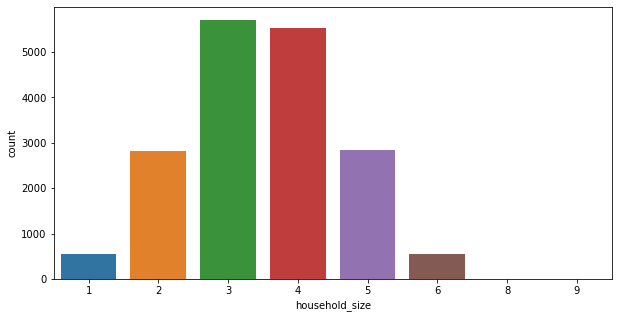

In [87]:
print("CATEGORICAL FEATURES")
countplot_df(categoricals)
print("DISCRETE FEATURES")
countplot_df(discrete)

In [88]:
discrete.columns

Index(['n_bank_accounts_open', 'n_credit_cards_held', 'n_homes_owned',
       'household_size'],
      dtype='object')

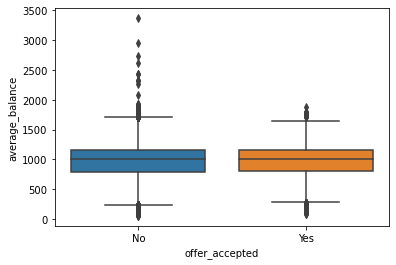

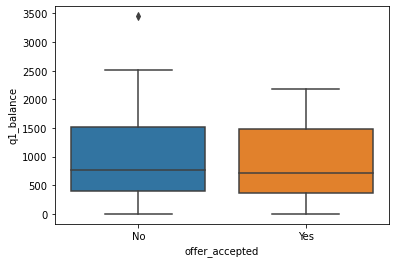

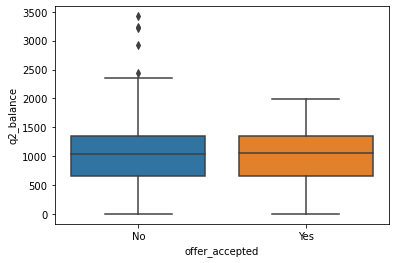

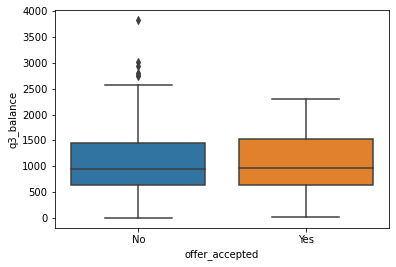

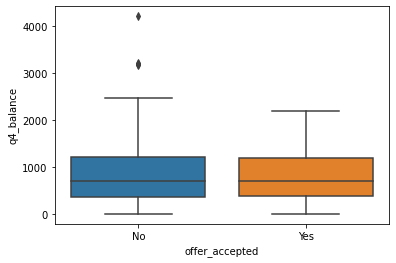

In [89]:
for i in list(continuous.columns):
    sns.boxplot(x="offer_accepted", y=i, data=df)
    plt.show()

**Idea 1**: delete outliers for "No" because of huge imbalance of data. 

**DECISION 1**: NO, banks never delete any data.

**Idea 2**: No further information in q1 - q4_balance. Delete?

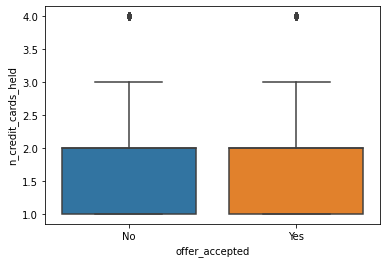

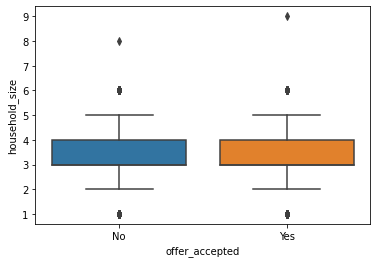

In [90]:
sns.boxplot(x="offer_accepted", y="n_credit_cards_held", data=df)
plt.show()

sns.boxplot(x="offer_accepted", y="household_size", data=df)
plt.show()

Distribution YES/ NO for feature n_credit_cards & householde_size equally

# 2.4 Correlation Matrix

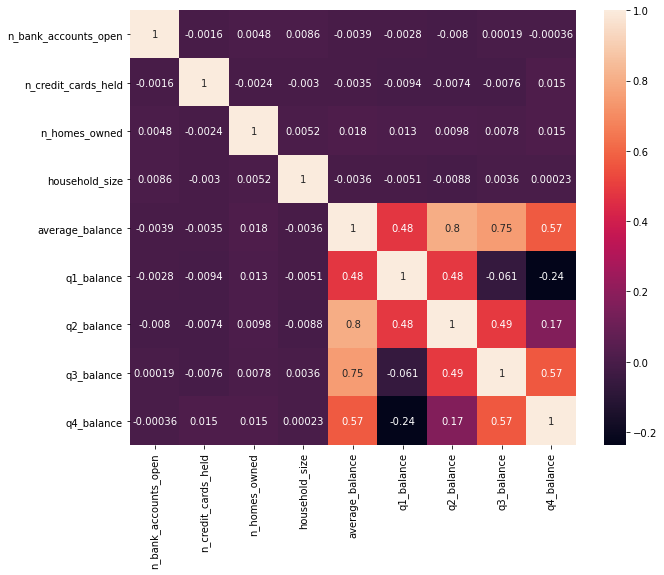

In [91]:
#function for corr_matrix
def corr_matrix_df(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    corr_matrix=df.corr(method='pearson')  # default
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr_matrix, annot=True)
    plt.show()

#Calling function
corr_matrix_df(numericals)

**Idea**: High correlation between q1 - q4_balance with averange balance, dropping them

In [92]:
numericals.drop(["q1_balance","q2_balance","q3_balance","q4_balance"],axis=1,inplace=True)



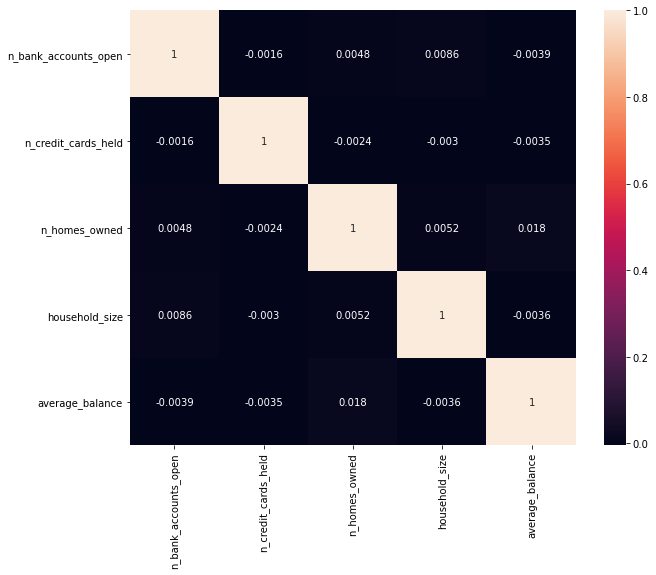

In [93]:
#Calling function
corr_matrix_df(numericals)

# 3 Data Preprocessing
## 3.1 Get dummies 

Not using booleans to not lose information

In [94]:
dummies=['offer_accepted', 'reward', 'mailer_type','overdraft_protection', 'own_your_home']
df_dumm=df[dummies]
df_dumm = pd.get_dummies(df_dumm, drop_first = True)
#df_dumm

## 3.2 Get ordinals

In [95]:
ordi=["income_level","credit_rating"]
df_ordi=df[ordi]
#df_ordi=df[["income_level","credit_rating"]]

ordinal_dic = {"Low" : 1, "Medium" : 2, "High" : 3}
df_ordi["credit_rating"] = df_ordi["credit_rating"].replace(ordinal_dic)
df_ordi["income_level"] = df_ordi["income_level"].replace(ordinal_dic)

## 3.3 Concating

In [96]:
df_final=pd.concat([discrete,continuous,df_ordi,df_dumm],axis=1)
df_final.drop(["q1_balance","q2_balance","q3_balance","q4_balance"],axis=1,inplace=True)

In [99]:
data_des(df_final)

DF shape
(17976, 13)
________________________________
DF info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 1 to 18000
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   n_bank_accounts_open      17976 non-null  int64  
 1   n_credit_cards_held       17976 non-null  int64  
 2   n_homes_owned             17976 non-null  int64  
 3   household_size            17976 non-null  int64  
 4   average_balance           17976 non-null  float64
 5   income_level              17976 non-null  int64  
 6   credit_rating             17976 non-null  int64  
 7   offer_accepted_Yes        17976 non-null  uint8  
 8   reward_Cash Back          17976 non-null  uint8  
 9   reward_Points             17976 non-null  uint8  
 10  mailer_type_Postcard      17976 non-null  uint8  
 11  overdraft_protection_Yes  17976 non-null  uint8  
 12  own_your_home_Yes         17976 non-null  uint8  
dtyp

In [105]:
df_final.columns

Index(['n_bank_accounts_open', 'n_credit_cards_held', 'n_homes_owned',
       'household_size', 'average_balance', 'income_level', 'credit_rating',
       'offer_accepted_Yes', 'reward_Cash Back', 'reward_Points',
       'mailer_type_Postcard', 'overdraft_protection_Yes',
       'own_your_home_Yes'],
      dtype='object')

In [136]:
df_final

,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,average_balance,income_level,credit_rating,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
customer_id,,,,,,,,,,,,,
1,1,2,1,4,1160.75,3,3,0,0,0,0,0,0
2,1,2,2,5,147.25,2,2,0,0,0,0,0,1
3,2,2,1,2,276.50,3,2,0,0,0,1,0,1
4,2,1,1,4,1219.00,2,3,0,0,0,0,0,0
5,1,2,1,6,1211.00,2,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17996,1,1,1,5,167.50,3,1,0,1,0,0,0,1
17997,1,3,1,3,850.50,3,1,0,1,0,0,0,1
17998,1,2,1,4,1087.25,3,1,0,1,0,0,0,0


# 3.4 Detecting correlation and multicolinearity 

## 3.4.1 Correlationmatrix with df_final

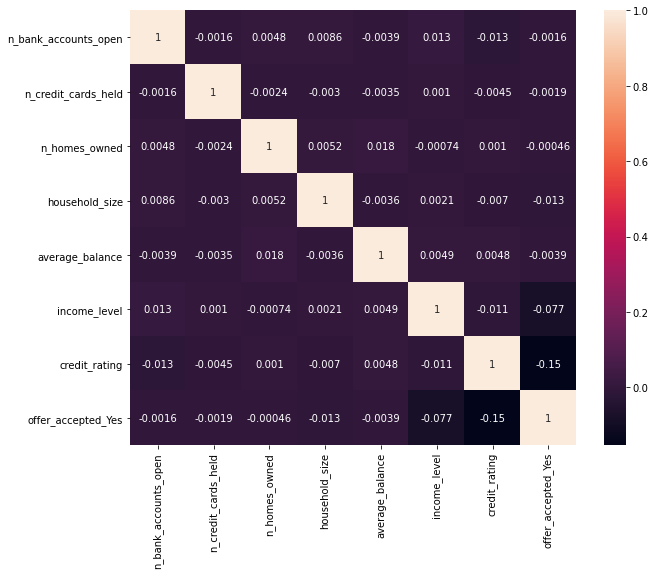

In [107]:
df_final_num=df_final.drop(['reward_Cash Back', 'reward_Points','mailer_type_Postcard', 'overdraft_protection_Yes','own_your_home_Yes'],axis=1)
corr_matrix_df(df_final_num)

## 3.4.2 Detecting Multicollinearity with VIF

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #no dummified data

# the independent variables set 
X_VIF = df_final_num
vif_data = pd.DataFrame() 
vif_data["feature"] = X_VIF.columns 

vif_data["VIF"] = [variance_inflation_factor(X_VIF.values, i) 
                          for i in range(len(X_VIF.columns))] 
  
print(vif_data)

                feature       VIF
0  n_bank_accounts_open  7.024305
1   n_credit_cards_held  5.964016
2         n_homes_owned  7.674114
3        household_size  8.855342
4       average_balance  7.141067
5          income_level  7.695847
6         credit_rating  6.254266
7    offer_accepted_Yes  1.075331


**DECISION**: VIF for all feature is within [-10,10]. No additional X-feature will be dropped.

## 3.4.3 Chi-squared

In [110]:
#Define function
def data_corr_mat(df,confidence):
    from itertools import combinations
    from scipy.stats import chi2_contingency

    columns = df.columns
    chi = pd.DataFrame(index=columns, columns=columns)
    p = pd.DataFrame(index=columns, columns=columns)
    nh = pd.DataFrame(index=columns, columns=columns)
    
    for var1, var2 in combinations(columns, 2):
        cont_table = pd.crosstab(df[var1], df[var2], margins=False)
        chi2_stat= chi2_contingency(cont_table)[0]
        p_stat= chi2_contingency(cont_table)[1]
        chi.loc[var2, var1] = chi2_stat
        chi.loc[var1, var2] = chi2_stat
        p.loc[var2, var1] = p_stat
        p.loc[var1, var2] = p_stat
        
        if p.loc[var2, var1] < confidence:
            nh.loc[var2, var1]='rejected'
        else:
            nh.loc[var2, var1]='accepted'
        if p.loc[var1, var2] < confidence:
            nh.loc[var1, var2]='rejected'
        else:
            nh.loc[var1, var2]='accepted'
            
    chi.fillna(0, inplace=True)
    p.fillna(0, inplace=True)
    return chi,p,nh

#Calling function
chi,p,nh=data_corr_mat(categoricals,0.95)

In [111]:
chi

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
offer_accepted,0.000000,101.147670,169.039505,113.617605,0.099898,445.062142,0.000731
reward,101.147670,0.000000,0.808408,2.416634,1.659715,2.397872,1.872008
mailer_type,169.039505,0.808408,0.000000,1.070711,0.134978,0.655558,0.316120
income_level,113.617605,2.416634,1.070711,0.000000,1.218264,2.979436,2.161451
overdraft_protection,0.099898,1.659715,0.134978,1.218264,0.000000,1.349474,1.231470
credit_rating,445.062142,2.397872,0.655558,2.979436,1.349474,0.000000,1.059823
own_your_home,0.000731,1.872008,0.316120,2.161451,1.231470,1.059823,0.000000


In [112]:
p

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
offer_accepted,0.000000e+00,1.086582e-22,1.199365e-38,2.129367e-25,0.751952,2.269780e-97,0.978426
reward,1.086582e-22,0.000000e+00,6.675078e-01,6.596233e-01,0.436111,6.630119e-01,0.392192
mailer_type,1.199365e-38,6.675078e-01,0.000000e+00,5.854611e-01,0.713326,7.205223e-01,0.573949
income_level,2.129367e-25,6.596233e-01,5.854611e-01,0.000000e+00,0.543823,5.612726e-01,0.339349
overdraft_protection,7.519518e-01,4.361113e-01,7.133258e-01,5.438226e-01,0.000000,5.092904e-01,0.267121
credit_rating,2.269780e-97,6.630119e-01,7.205223e-01,5.612726e-01,0.509290,0.000000e+00,0.588657
own_your_home,9.784255e-01,3.921919e-01,5.739485e-01,3.393493e-01,0.267121,5.886572e-01,0.000000


In [113]:
nh

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
offer_accepted,NaN,rejected,rejected,rejected,rejected,rejected,accepted
reward,rejected,NaN,rejected,rejected,rejected,rejected,rejected
mailer_type,rejected,rejected,NaN,rejected,rejected,rejected,rejected
income_level,rejected,rejected,rejected,NaN,rejected,rejected,rejected
overdraft_protection,rejected,rejected,rejected,rejected,NaN,rejected,rejected
credit_rating,rejected,rejected,rejected,rejected,rejected,NaN,rejected
own_your_home,accepted,rejected,rejected,rejected,rejected,rejected,NaN


**DECISION**: Nullhypothesis is defined as "the features are indepent" from each other. own_your_home is independent from our target, we can drop this feature.

# 3.5 Handling outliers

In [162]:
def skew_df(df):
    from scipy.stats import skew
    
    cols=list(df.columns)
    
    for col in cols:
        sk=df[col].skew()
        print("the skew of {} is: {}".format(col,sk))

skew_df(continuous)

the skew of average_balance is: -0.5723407970872233
the skew of q1_balance is: 0.4109111821855019
the skew of q2_balance is: -0.18299270673139534
the skew of q3_balance is: 0.28962875846919944
the skew of q4_balance is: 0.6411829058277463


**DECISION**: There is no skew out of range [-2,2]. No log or boxcox transformation applied. 

# 4. Feature Engineering
Get probability of offer accepted per feature

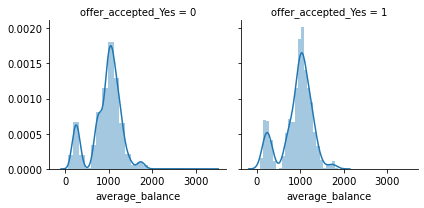

In [114]:
g = sns.FacetGrid(df_final, col = "offer_accepted_Yes")
g.map(sns.distplot, "average_balance", bins = 25)
plt.show()

In [126]:
#providing data_set, need the raw_data from "df"
df_final_feature=df.drop(['average_balance',"q1_balance","q2_balance","q3_balance","q4_balance"],axis=1)
offer = {"No" : 0, "Yes" : 1}
df_final_feature["offer_accepted"] = df_final_feature["offer_accepted"].replace(offer)

In [127]:
df_final_feature.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'n_bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'n_credit_cards_held', 'n_homes_owned', 'household_size',
       'own_your_home'],
      dtype='object')

___________
reward
      reward  offer_accepted
0  Air Miles        0.076567
2     Points        0.059319
1  Cash Back        0.034362


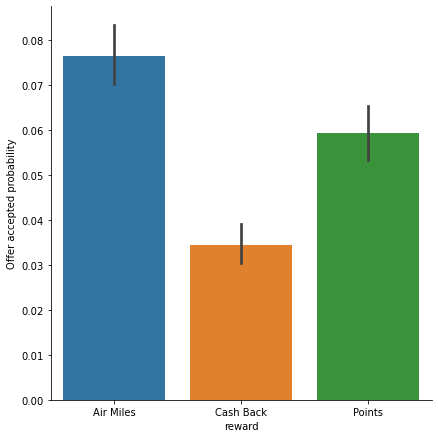

___________
mailer_type
  mailer_type  offer_accepted
1    Postcard        0.078936
0      Letter        0.033929


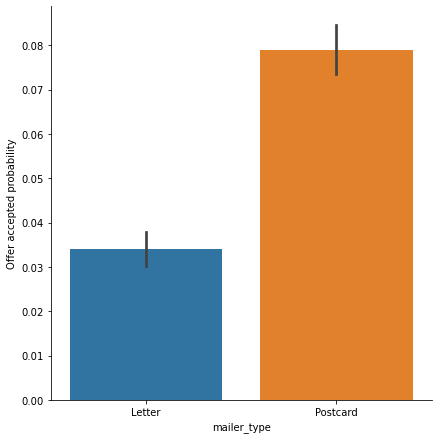

___________
income_level
  income_level  offer_accepted
1          Low        0.086869
2       Medium        0.052100
0         High        0.036513


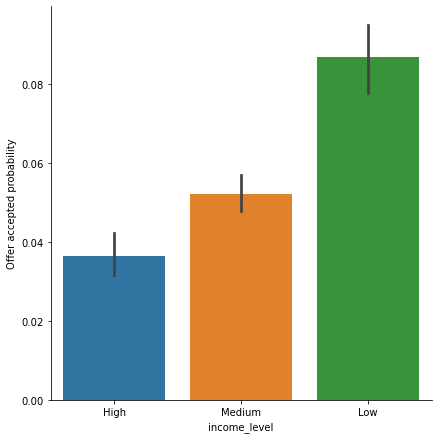

___________
n_bank_accounts_open
   n_bank_accounts_open  offer_accepted
1                     2        0.058398
0                     1        0.056677
2                     3        0.040678


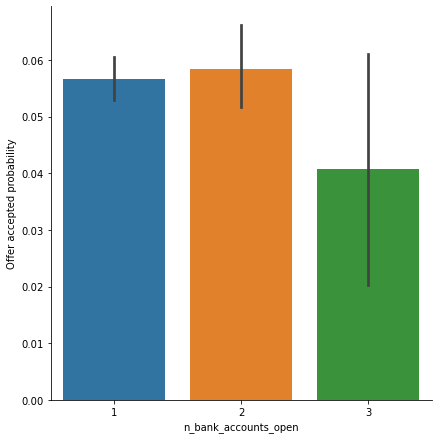

___________
overdraft_protection
  overdraft_protection  offer_accepted
0                   No        0.057059
1                  Yes        0.055306


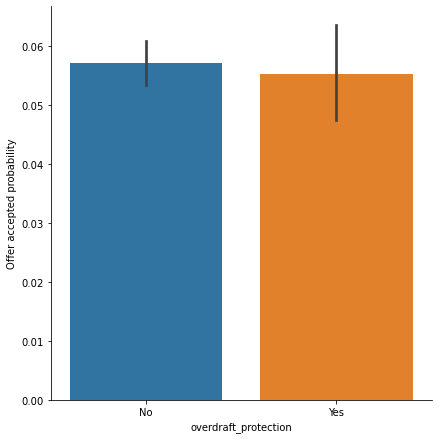

___________
credit_rating
  credit_rating  offer_accepted
1           Low        0.106422
2        Medium        0.045104
0          High        0.019624


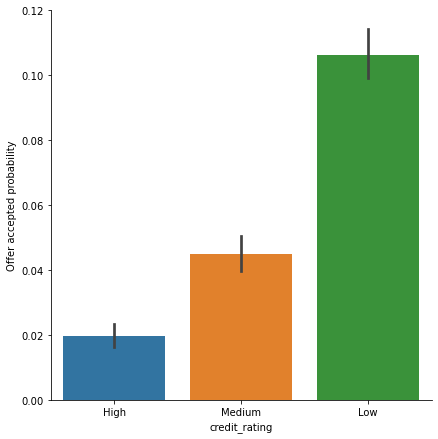

___________
n_credit_cards_held
   n_credit_cards_held  offer_accepted
0                    1        0.058728
2                    3        0.058563
3                    4        0.056311
1                    2        0.054582


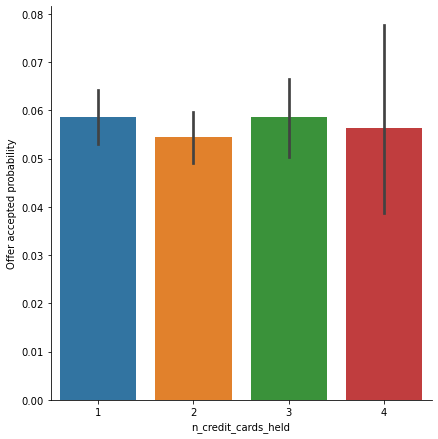

___________
n_homes_owned
   n_homes_owned  offer_accepted
1              2        0.057464
0              1        0.056751
2              3        0.048649


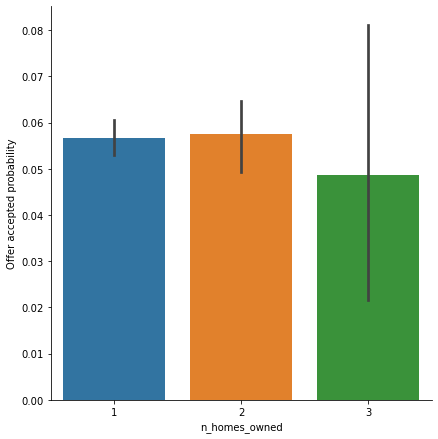

___________
household_size
   household_size  offer_accepted
7               9        1.000000
0               1        0.079777
2               3        0.060298
3               4        0.056038
1               2        0.053756
4               5        0.050859
5               6        0.050186
6               8        0.000000


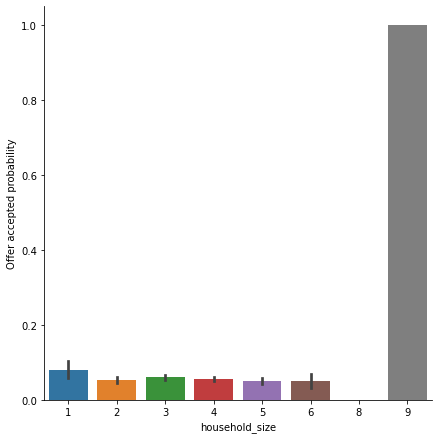

___________
own_your_home
  own_your_home  offer_accepted
1           Yes        0.056806
0            No        0.056782


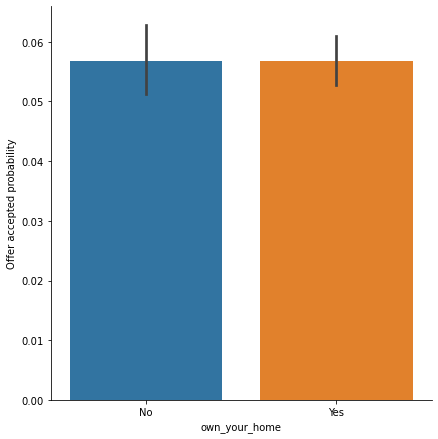

In [129]:
#defining feature to plot againts probability offer_accepted
cols= ['reward', 'mailer_type', 'income_level',
       'n_bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'n_credit_cards_held', 'n_homes_owned', 'household_size','own_your_home']

for i in cols:
    out_df=df_final_feature[[i,"offer_accepted"]].groupby([i],as_index=False).mean().sort_values(by="offer_accepted", ascending=False)
    print("___________")
    print(i)
    print(out_df)
    g = sns.factorplot(x = i, y = "offer_accepted", data = df_final_feature, kind = "bar", size = 6)
    g.set_ylabels("Offer accepted probability")
    plt.show()

**DECISION**: Nullhypothesis is defined as "the features are indepent" from each other. own_your_home is independent from our target, we can drop this feature. 

*Can be seen in the countplot as well.*

In [168]:
df_final.drop(["own_your_home_Yes"],axis=1,inplace=True)

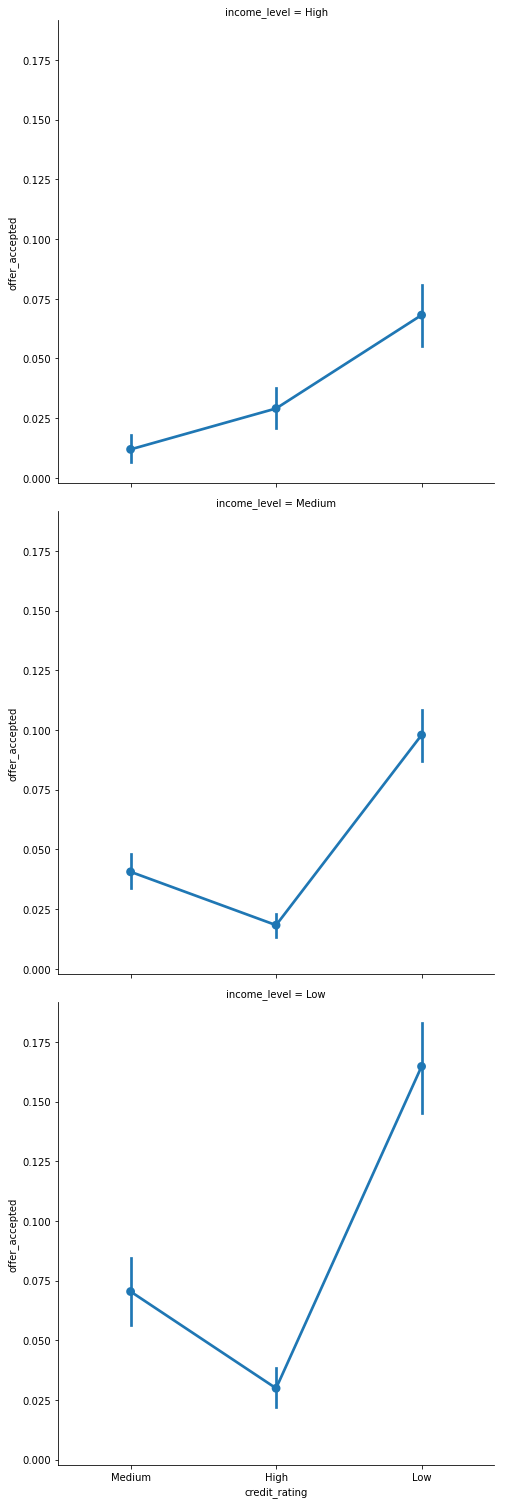

In [131]:
g = sns.FacetGrid(df_final_feature, row = "income_level", size = 7)
g.map(sns.pointplot, "credit_rating","offer_accepted")
g.add_legend()
plt.show()

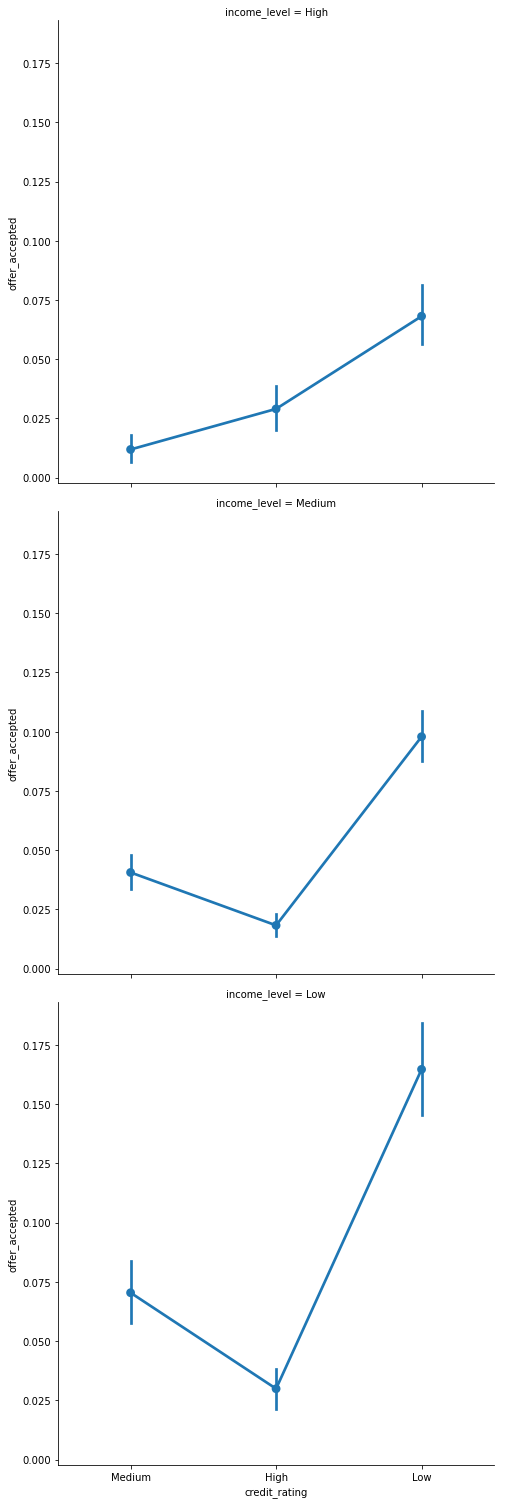

In [132]:
g = sns.FacetGrid(df_final_feature, row = "income_level", size = 7)
g.map(sns.pointplot, "credit_rating","offer_accepted")
g.add_legend()
plt.show()

# 4.1 Automated Feature importance

In [157]:
#function sampling/balancing
#this function is called within the autofeature function
def balance (X_train_scaled, Y, sampler): #sampler=str
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.over_sampling import RandomOverSampler
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import TomekLinks
    
    print("Before sampling:")
    print("Length X: ", len(X_train_scaled))
    print("Length Y: ", len(Y))
    print("_______________")
    print(pd.DataFrame(Y).value_counts())
    
    
    if sampler=="RandomUnderSampler":
        sa = RandomUnderSampler()
        X_s, y_s = sa.fit_sample(X_train_scaled, Y)
        print("_______________")
        print("After sampling:")
        print(pd.DataFrame(y_s).value_counts())
        print(len(y_s))
        
        return X_s, y_s
    
    elif sampler=="RandomOverSampler":
        sa = RandomOverSampler()
        X_s, y_s = sa.fit_sample(X_train_scaled, Y)
        print("_______________")
        print("After sampling:")
        print(pd.DataFrame(y_s).value_counts())
        print(len(y_s))
        
        return X_s, y_s
    
    elif sampler=="SMOTE":
        sa = SMOTE()
        X_s, y_s = sa.fit_sample(X_train_scaled, Y)
        print("_______________")
        print("After sampling:")
        print(pd.DataFrame(y_s).value_counts())
        print(len(y_s))
        
        return X_s, y_s
    
    elif sampler=="TomekLinks":
        sa = TomekLinks('majority')
        X_s, y_s = sa.fit_sample(X_train_scaled, Y)
        print("_______________")
        print("After sampling:")
        print(pd.DataFrame(y_s).value_counts())
        print(len(y_s))
        
        return X_s, y_s

In [158]:
def Autofeature(X,Y,scaler=StandardScaler(), model=RandomForestClassifier()):    # RandomForestClassifier()  or RandomForestRegressor() for Modell
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import RandomForestRegressor
    from matplotlib import pyplot
    #scaling
    scaler_x = scaler.fit(X)
    X_scaled = pd.DataFrame(scaler_x.transform(X),columns=X.columns, index=X.index)
    #upsampling
    X, y = balance (X_scaled, Y, "TomekLinks")
    Xs_scaled, ys = balance (X, y, "SMOTE")
     

    model.fit(Xs_scaled, ys)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

In [171]:
Y=df_final["offer_accepted_Yes"]
X=df_final.drop(["offer_accepted_Yes"],axis=1)

Before sampling:
Length X:  17976
Length Y:  17976
_______________
offer_accepted_Yes
0                     16955
1                      1021
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     16405
1                      1021
dtype: int64
17426
Before sampling:
Length X:  17426
Length Y:  17426
_______________
offer_accepted_Yes
0                     16405
1                      1021
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     16405
1                     16405
dtype: int64
32810
Feature: 0, Score: 0.03087
Feature: 1, Score: 0.09459
Feature: 2, Score: 0.02666
Feature: 3, Score: 0.15768
Feature: 4, Score: 0.18894
Feature: 5, Score: 0.11165
Feature: 6, Score: 0.23945
Feature: 7, Score: 0.04232
Feature: 8, Score: 0.02655
Feature: 9, Score: 0.06198
Feature: 10, Score: 0.01930


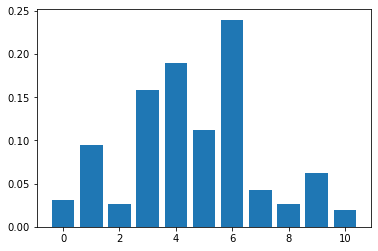

In [172]:
Autofeature(X,Y)

0='n_bank_accounts_open'

**1='n_credit_cards_held'**

2='n_homes_owned'

**3='household_size'**

**4='average_balance'**

**5='income_level'**

**6='credit_rating'**

7='reward_Cash Back'

8='reward_Points'

**9='mailer_type_Postcard'**

10='overdraft_protection_Yes'

We will predict with two df_final:

1. **df_final** with all features named above
2. **df_final2** with features selected due to the automated feature importance

In [251]:
stay=['n_credit_cards_held','household_size', 'average_balance', 'income_level', 'credit_rating','mailer_type_Postcard',"offer_accepted_Yes"]


In [252]:
df_final2=df_final[stay]

In [ ]:
#For dropping "mailer_type_Postcard" please see: 

In [440]:
df_final3=df_final2.drop(["mailer_type_Postcard"],axis=1)

In [253]:
data_des(df_final)

DF shape
(17976, 12)
________________________________
DF info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 1 to 18000
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   n_bank_accounts_open      17976 non-null  int64  
 1   n_credit_cards_held       17976 non-null  int64  
 2   n_homes_owned             17976 non-null  int64  
 3   household_size            17976 non-null  int64  
 4   average_balance           17976 non-null  float64
 5   income_level              17976 non-null  int64  
 6   credit_rating             17976 non-null  int64  
 7   offer_accepted_Yes        17976 non-null  uint8  
 8   reward_Cash Back          17976 non-null  uint8  
 9   reward_Points             17976 non-null  uint8  
 10  mailer_type_Postcard      17976 non-null  uint8  
 11  overdraft_protection_Yes  17976 non-null  uint8  
dtypes: float64(1), int64(6), uint8(5)
memory usage: 1.7 MB

In [254]:
data_des(df_final2)

DF shape
(17976, 7)
________________________________
DF info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 1 to 18000
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   n_credit_cards_held   17976 non-null  int64  
 1   household_size        17976 non-null  int64  
 2   average_balance       17976 non-null  float64
 3   income_level          17976 non-null  int64  
 4   credit_rating         17976 non-null  int64  
 5   mailer_type_Postcard  17976 non-null  uint8  
 6   offer_accepted_Yes    17976 non-null  uint8  
dtypes: float64(1), int64(4), uint8(2)
memory usage: 1.4 MB
None
________________________________
DF describe
       n_credit_cards_held  household_size  average_balance  income_level  \
count         17976.000000    17976.000000     17976.000000  17976.000000   
mean              1.903427        3.499110       940.515562      2.003560   
std               0.797086     

In [441]:
data_des(df_final3)

DF shape
(17976, 6)
________________________________
DF info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 1 to 18000
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   n_credit_cards_held  17976 non-null  int64  
 1   household_size       17976 non-null  int64  
 2   average_balance      17976 non-null  float64
 3   income_level         17976 non-null  int64  
 4   credit_rating        17976 non-null  int64  
 5   offer_accepted_Yes   17976 non-null  uint8  
dtypes: float64(1), int64(4), uint8(1)
memory usage: 1.3 MB
None
________________________________
DF describe
       n_credit_cards_held  household_size  average_balance  income_level  \
count         17976.000000    17976.000000     17976.000000  17976.000000   
mean              1.903427        3.499110       940.515562      2.003560   
std               0.797086        1.114476       350.297837      0.706567   
min          

# 5 Classification model

## Function for model

In [442]:
#Our data is high unbalanced. We are apllying TOMEK & SOMET

In [481]:
#BSP model=
#LogisticRegression(random_state=0, solver='lbfgs',multi_class=multi_class).fit(X_train_scaled_sampled, y_train_sampled)
#RandomForestClassifier(n_estimators=100,max_depth=12, min_samples_split=2000, min_samples_leaf=1000)

# Quick & dirty model
def quickie(df,target,scaler=StandardScaler(),model=AdaBoostClassifier()): #target=str
    
    #-- 1 --
    #X-Y-SPLIT
    Y=df["offer_accepted_Yes"]
    X=df.drop(["offer_accepted_Yes"],axis=1)

    #-- 2 --
    #TRAIN-TEST-SPLIT
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

    #-- 3 --
    #SCALING
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import Normalizer
    #transformer on X_train
    transformer = scaler.fit(X_train)
    #X-train & X-test Scaling on same transformer
    X_train_scaled= pd.DataFrame(transformer.transform(X_train), columns = X.columns, index = X_train.index)
    X_test_scaled= pd.DataFrame(transformer.transform(X_test), columns = X.columns, index = X_test.index)

    #-- 4 --
    #BALANCING
    #Calling *balance* function twice
    X_train_scaled_sampled_0, y_train_sampled_0=balance(X_train_scaled, y_train, "TomekLinks")

    X_train_scaled_sampled, y_train_sampled=balance(X_train_scaled_sampled_0, y_train_sampled_0, "SMOTE")

    #-- 5 --
    #MODELING
    print(model)
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier

    model= model
    classification=model.fit(X_train_scaled_sampled, y_train_sampled)

    y_train_sampled_pred = classification.predict(X_train_scaled_sampled)
    y_train_sampled_pred_df = pd.DataFrame(y_train_sampled_pred,index=y_train_sampled.index,columns=[target])

    y_test_pred = classification.predict(X_test_scaled)
    probability = classification.predict_proba(X_test_scaled)
    y_test_pred_df = pd.DataFrame(y_test_pred,index=y_test.index,columns=[target + "_pred"])
    
    
    #-- 6 --
    #ERROR-MATRIX
    from sklearn.metrics import cohen_kappa_score
    from sklearn.metrics import classification_report

    print("The accuracy of the model in the TRAIN set is: ", round(classification.score(X_train_scaled_sampled, y_train_sampled),2))
    print("The kappa of the model in the TRAIN set is: ", cohen_kappa_score(y_train_sampled,y_train_sampled_pred))

    print("________________________TRAIN_______________________________________")
    print(classification_report(y_train_sampled, y_train_sampled_pred))

    print("The accuracy of the model in the TEST set is: ", round(classification.score(X_test_scaled,y_test),2))
    print("The kappa of the model in the TEST set is: ", cohen_kappa_score(y_test,y_test_pred))

    print("________________________TEST_______________________________________")
    print(classification_report(y_test, y_test_pred))
    
    #-- 7 --
    #CONF-MATRIX
    from sklearn.metrics import confusion_matrix, plot_confusion_matrix
    
    print("The values are:")
    print(confusion_matrix(y_test, y_test_pred_df))
    
    plot_confusion_matrix(classification, X_test_scaled, y_test)
    plt.show()
    
    return X_test, y_test, classification, y_train_sampled_pred, y_train_sampled_pred_df, y_test_pred, probability, y_test_pred_df, model




## Function for changing threshold

In [482]:
# function to change the threshold in predictions
def adjust_threshold(test_set, predictions, probability, threshold = 0.5):
    from sklearn import model_selection, metrics
    from sklearn.experimental import enable_hist_gradient_boosting
    from sklearn.ensemble import HistGradientBoostingClassifier
    print('========================================================================')
    print('Before threshold adjustment:')
    check = confusion_matrix(test_set, predictions)
    print(check)
    
    #plot
    predtst=probability[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(test_set, predtst)
    dfplot=pd.DataFrame({'Threshold':thresholds,
        'False Positive Rate':fpr, 
        'False Negative Rate': 1.-tpr})
    ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
        'False Negative Rate'], figsize=(10,6))
    ax.plot([0.5,0.5],[0,0.5]) #mark example thresh.
    ax.set_xbound(0.02,1); ax.set_ybound(0,1) #zoom in
    plt.show()
    
    #changing classfication to new threshold
    probability = pd.DataFrame(probability)
    pred=predictions
    #predictions = pd.DataFrame(predictions)
    for i in range(len(probability[1])):
        if probability[1][i] >= threshold:
            pred[i] = 1
            
    check = confusion_matrix(test_set, pred)
    print('========================================================================')
    print('\nAfter threshold adjustment with threshold = >>{}<<'.format(round(threshold,4)))
    print(check)
    
    #predtst=probability[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(test_set, predtst)
    dfplot=pd.DataFrame({'Threshold':thresholds,
        'False Positive Rate':fpr, 
        'False Negative Rate': 1.-tpr})
    ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
        'False Negative Rate'], figsize=(10,6))
    ax.plot([threshold,threshold],[0,0.5]) #mark example thresh.
    ax.set_xbound(0.02,1); ax.set_ybound(0,1) #zoom in
    plt.show()
    print('\n========================================================================')

#predictions, check = adjust_threshold(test_set,predictions, probability, threshold = 0.5)

In [489]:
def fn_terminator(test_set, predictions, probability):
    from sklearn.metrics import confusion_matrix
    probability = pd.DataFrame(probability)
    check = confusion_matrix(test_set, predictions)
    print('========================================================================')
    print('Before threshold adjustment:')
    print(check)
    predictions2 = predictions
    threshold = 0.5
    condition = True
    check_org = check
    fp_original = check[0][1]
    while condition == True:
        #print(check[1][0])
        if check[1][0] !=0:
            threshold = threshold - 0.01
            for i in range(len(probability.iloc[:,1])):
                if probability.iloc[i,1] >= threshold:
                    predictions2[i] = 1
            check = confusion_matrix(test_set, predictions2)  
        else: 
            condition = False
            #print('Falsch')
    increase = check[0][1] - fp_original
    print('\nAfter threshold adjustment with threshold = >>{}<<'.format(round(threshold,2)))
    print(check)
    print('\n========================================================================')
    print('By eliminating the false negatives, the false positives increase by {}!!!'.format(increase))
    print('========================================================================')
    return threshold, check

#threshold, check = fn_terminator(test_set, predictions, probability)



## 5.1 Modelling

Our modeling will be done on 3 df (df_final, df_final2, df_final3) with four different models. 

### 5.1.1 df_final, scaler=StandardScaler(), model = (LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr'))

Before sampling:
Length X:  12583
Length Y:  12583
_______________
offer_accepted_Yes
0                     11862
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11475
1                       721
dtype: int64
12196
Before sampling:
Length X:  12196
Length Y:  12196
_______________
offer_accepted_Yes
0                     11475
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11475
1                     11475
dtype: int64
22950
LogisticRegression(multi_class='ovr', random_state=0)
The accuracy of the model in the TRAIN set is:  0.71
The kappa of the model in the TRAIN set is:  0.4101960784313725
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.71      0.68      0.70     11475
           1       0.70      0.73      0.71     11475

    accuracy                      

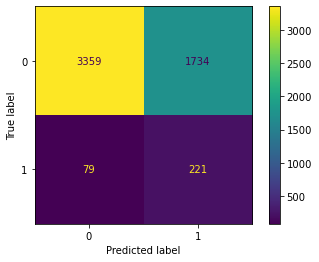

Before threshold adjustment:
[[3359 1734]
 [  79  221]]


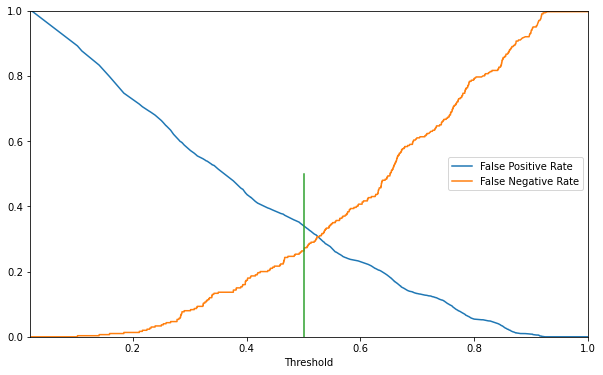


After threshold adjustment with threshold = >>0.5<<
[[3359 1734]
 [  79  221]]


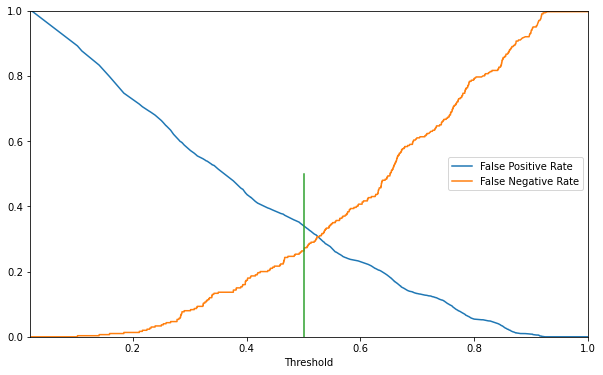

In [530]:
X_test, y_test, classification, y_train_sampled_pred, y_train_sampled_pred_df, y_test_pred, probability, y_test_pred_df, model=quickie(df_final,"offer_accepted_Yes",model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr'))
conf11=confusion_matrix(y_test, y_test_pred_df)

test=y_test
test_pred=y_test_pred
probs=probability

adjust_threshold(test,test_pred, probs, threshold = 0.5)

In [491]:
conf11

array([[3360, 1733],
       [  76,  224]])

In [531]:
threshold, check = fn_terminator(y_test, y_test_pred, probability)

Before threshold adjustment:
[[3359 1734]
 [  79  221]]

After threshold adjustment with threshold = >>0.1<<
[[ 523 4570]
 [   0  300]]

By eliminating the false negatives, the false positives increase by 2836!!!


### 5.1.2 df_final2, scaler=StandardScaler(), model = (LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr'))

Before sampling:
Length X:  12583
Length Y:  12583
_______________
offer_accepted_Yes
0                     11862
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11444
1                       721
dtype: int64
12165
Before sampling:
Length X:  12165
Length Y:  12165
_______________
offer_accepted_Yes
0                     11444
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11444
1                     11444
dtype: int64
22888
LogisticRegression(multi_class='ovr', random_state=0)
The accuracy of the model in the TRAIN set is:  0.68
The kappa of the model in the TRAIN set is:  0.3640335547011534
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.70      0.64      0.67     11444
           1       0.67      0.72      0.69     11444

    accuracy                      

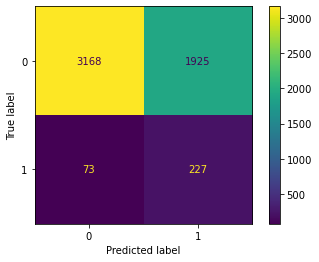

Before threshold adjustment:
[[3168 1925]
 [  73  227]]


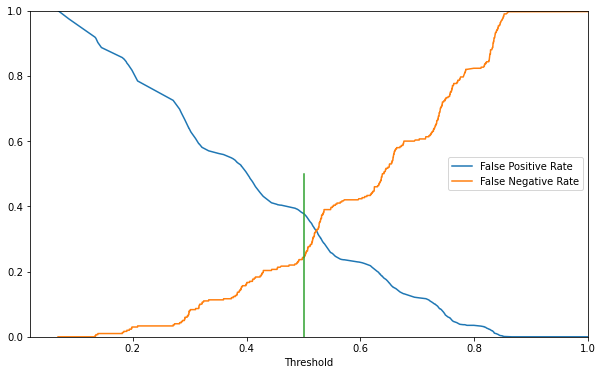


After threshold adjustment with threshold = >>0.5<<
[[3168 1925]
 [  73  227]]


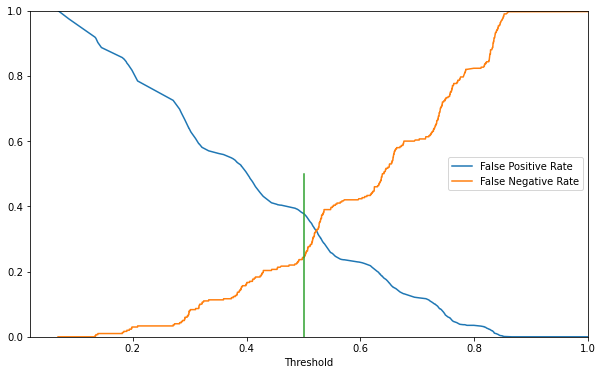

In [595]:
X_test, y_test, classification, y_train_sampled_pred, y_train_sampled_pred_df, y_test_pred, probability, y_test_pred_df,model=quickie(df_final2,"offer_accepted_Yes",model = (LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr')))
conf12=confusion_matrix(y_test, y_test_pred_df)

test=y_test
test_pred=y_test_pred
probs=probability

adjust_threshold(test,test_pred, probs, threshold = 0.50)

In [579]:
threshold, check = fn_terminator(y_test, y_test_pred, probability)


Before threshold adjustment:
[[ 410 4683]
 [   1  299]]

After threshold adjustment with threshold = >>0.12<<
[[ 257 4836]
 [   0  300]]

By eliminating the false negatives, the false positives increase by 153!!!


In [580]:
df2_LOG= pd.concat([X_test, y_test, y_test_pred_df],axis=1)

In [581]:
def trash(probability,y_test_pred,y_test_pred_df,threshold):
    predictions2=y_test_pred
    probability = pd.DataFrame(probability)

    for i in range(len(probability.iloc[:,1])):
        if probability.iloc[i,1] >= threshold:
            predictions2[i] = 1
                #check = confusion_matrix(test_set, predictions2)
                
    predictions2_df = pd.DataFrame(predictions2,columns=[threshold],index=y_test_pred_df.index)
    
    return predictions2_df

In [587]:
probability_df=pd.DataFrame(probability, columns=["probability NO","probability YES"],index=y_test_pred_df.index)
probability_df

,probability NO,probability YES
customer_id,,
16666,0.906427,0.093573
17663,0.677052,0.322948
17735,0.815314,0.184686
11169,0.250671,0.749329
11384,0.804910,0.195090
...,...,...
6258,0.867977,0.132023
8446,0.591821,0.408179
12571,0.161192,0.838808


In [583]:
predictions27=trash(probability,y_test_pred,y_test_pred_df,0.27)
predictions27

,0.27
customer_id,
16666,0
17663,1
17735,1
11169,1
11384,1
...,...
6258,1
8446,1
12571,1


In [584]:
predictions38=trash(probability,y_test_pred,y_test_pred_df,0.38)
predictions38

,0.38
customer_id,
16666,0
17663,1
17735,1
11169,1
11384,1
...,...
6258,1
8446,1
12571,1


In [585]:
predictions13=trash(probability,y_test_pred,y_test_pred_df,0.13)
predictions13

,0.13
customer_id,
16666,0
17663,1
17735,1
11169,1
11384,1
...,...
6258,1
8446,1
12571,1


In [588]:
df2_LOG= pd.concat([X_test, y_test, y_test_pred_df,probability_df,predictions38,predictions27,predictions13],axis=1)

In [568]:
df2_LOG

,n_credit_cards_held,household_size,average_balance,income_level,credit_rating,mailer_type_Postcard,offer_accepted_Yes,offer_accepted_Yes_pred,0.38,0.27,0.13
customer_id,,,,,,,,,,,
16666,2,3,231.25,3,3,0,0,0,0,0,0
17663,1,1,1106.50,2,2,0,0,1,1,1,1
17735,2,4,1206.25,3,3,1,0,1,1,0,1
11169,1,5,231.25,2,1,1,0,1,1,1,1
11384,1,3,1180.25,3,2,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6258,1,3,1293.00,2,3,0,1,1,1,0,1
8446,2,2,1179.50,3,1,0,0,1,1,1,1
12571,2,2,1450.25,1,1,1,0,1,1,1,1


In [594]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
figure = plt.figure(figsize=(27, 9))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(df2_LOG), len(classifiers) + 1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

NameError: name 'datasets' is not defined

<Figure size 1944x648 with 0 Axes>

In [589]:
df2_LOG.to_csv(path_or_buf="/Users/carolinvogt/Becoming_Data_Analyst/Week_05/CCCC/predictions_project_with_prob.csv", columns=df2_LOG.columns)



### 5.1.3 df_final3, scaler=StandardScaler(), model = (LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr'))

Before sampling:
Length X:  12583
Length Y:  12583
_______________
offer_accepted_Yes
0                     11862
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11437
1                       721
dtype: int64
12158
Before sampling:
Length X:  12158
Length Y:  12158
_______________
offer_accepted_Yes
0                     11437
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11437
1                     11437
dtype: int64
22874
LogisticRegression(multi_class='ovr', random_state=0)
The accuracy of the model in the TRAIN set is:  0.66
The kappa of the model in the TRAIN set is:  0.3258721692751596
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.68      0.62      0.65     11437
           1       0.65      0.71      0.68     11437

    accuracy                      

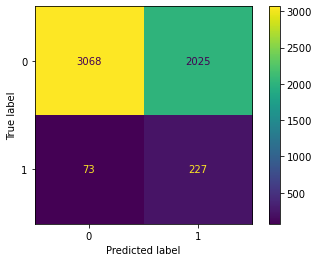

Before threshold adjustment:
[[3068 2025]
 [  73  227]]


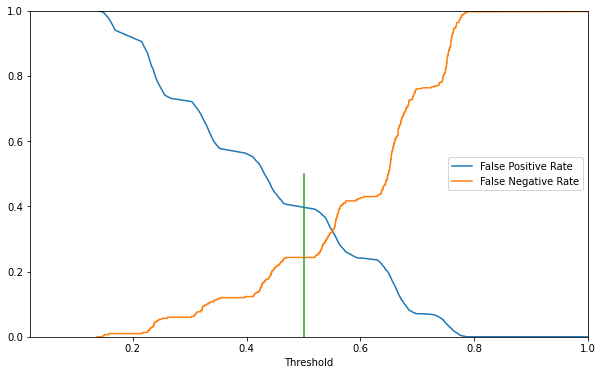


After threshold adjustment with threshold = >>0.41<<
[[2273 2820]
 [  37  263]]


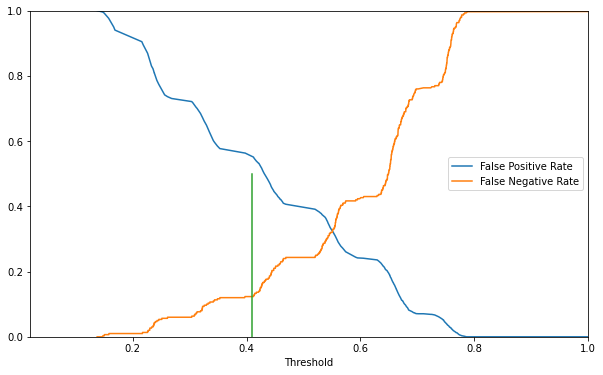

In [535]:
X_test, y_test, classification, y_train_sampled_pred, y_train_sampled_pred_df, y_test_pred, probability, y_test_pred_df,model=quickie(df_final3,"offer_accepted_Yes",model = (LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr')))
conf13=confusion_matrix(y_test, y_test_pred_df)

test=y_test
test_pred=y_test_pred
probs=probability

adjust_threshold(test,test_pred, probs, threshold = 0.41)

In [534]:
threshold, check = fn_terminator(y_test, y_test_pred, probability)

Before threshold adjustment:
[[2403 2690]
 [  42  258]]

After threshold adjustment with threshold = >>0.14<<
[[  11 5082]
 [   0  300]]

By eliminating the false negatives, the false positives increase by 2392!!!


### 5.2.1 df_final, scaler=StandardScaler(), model=(RandomForestClassifier(n_estimators=100,max_depth=12, min_samples_split=2000, min_samples_leaf=1000))

Before sampling:
Length X:  12583
Length Y:  12583
_______________
offer_accepted_Yes
0                     11862
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11475
1                       721
dtype: int64
12196
Before sampling:
Length X:  12196
Length Y:  12196
_______________
offer_accepted_Yes
0                     11475
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11475
1                     11475
dtype: int64
22950
RandomForestClassifier(max_depth=12, min_samples_leaf=1000,
                       min_samples_split=2000)
The accuracy of the model in the TRAIN set is:  0.75
The kappa of the model in the TRAIN set is:  0.5085838779956426
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.74      0.79      0.76     11475
           1       0.77      0.72   

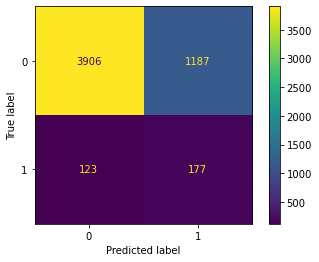

Before threshold adjustment:
[[3906 1187]
 [ 123  177]]


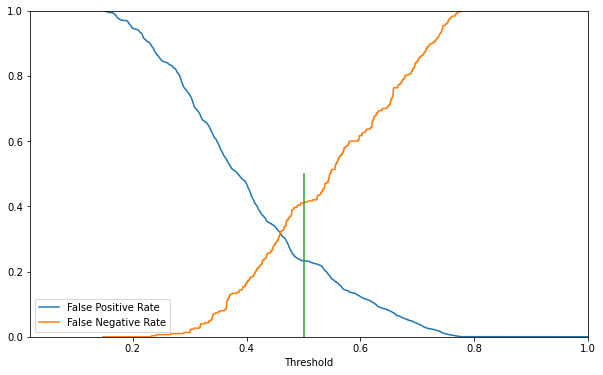


After threshold adjustment with threshold = >>0.46<<
[[3491 1602]
 [  96  204]]


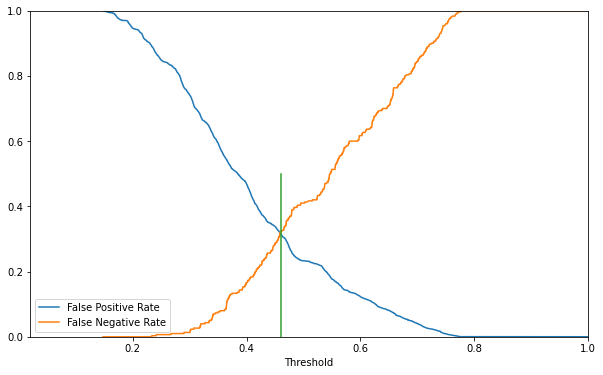

In [500]:
X_test, y_test, classification, y_train_sampled_pred, y_train_sampled_pred_df, y_test_pred, probability, y_test_pred_df,model=quickie(df_final,"offer_accepted_Yes",model=(RandomForestClassifier(n_estimators=100,max_depth=12, min_samples_split=2000, min_samples_leaf=1000)))
conf21=confusion_matrix(y_test, y_test_pred_df)

test=y_test
test_pred=y_test_pred
probs=probability

adjust_threshold(test,test_pred, probs, threshold = 0.46)

In [501]:
threshold, check = fn_terminator(y_test, y_test_pred, probability)

Before threshold adjustment:
[[3491 1602]
 [  96  204]]

After threshold adjustment with threshold = >>0.23<<
[[ 506 4587]
 [   0  300]]

By eliminating the false negatives, the false positives increase by 2985!!!


### 5.2.2 df_final2, scaler=StandardScaler(), model=(RandomForestClassifier(n_estimators=100,max_depth=12, min_samples_split=2000, min_samples_leaf=1000))

Before sampling:
Length X:  12583
Length Y:  12583
_______________
offer_accepted_Yes
0                     11862
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11444
1                       721
dtype: int64
12165
Before sampling:
Length X:  12165
Length Y:  12165
_______________
offer_accepted_Yes
0                     11444
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11444
1                     11444
dtype: int64
22888
RandomForestClassifier(max_depth=12, min_samples_leaf=1000,
                       min_samples_split=2000)
The accuracy of the model in the TRAIN set is:  0.69
The kappa of the model in the TRAIN set is:  0.3806361412093674
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.67      0.74      0.70     11444
           1       0.71      0.64   

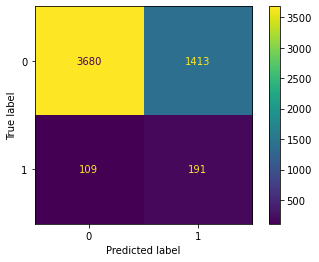

Before threshold adjustment:
[[3680 1413]
 [ 109  191]]


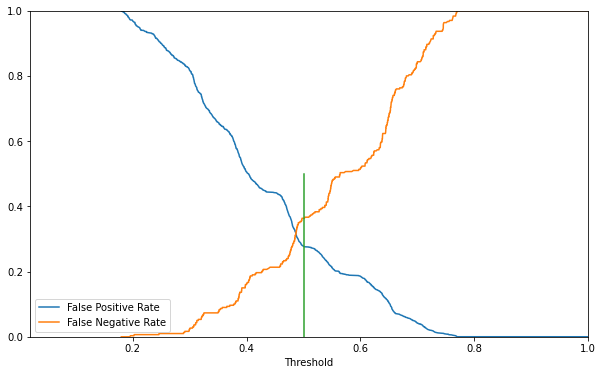


After threshold adjustment with threshold = >>0.47<<
[[3068 2025]
 [  71  229]]


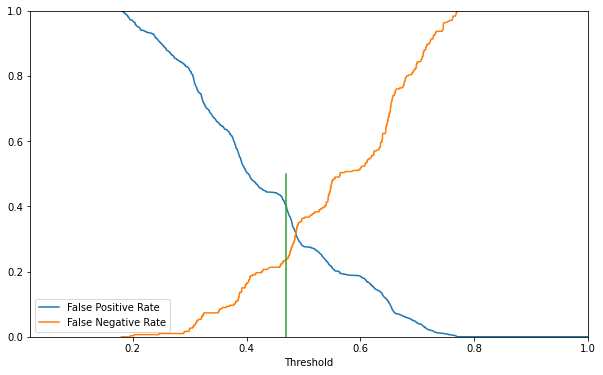

In [502]:
X_test, y_test, classification, y_train_sampled_pred, y_train_sampled_pred_df, y_test_pred, probability, y_test_pred_df,model=quickie(df_final2,"offer_accepted_Yes",model=(RandomForestClassifier(n_estimators=100,max_depth=12, min_samples_split=2000, min_samples_leaf=1000)))
conf22=confusion_matrix(y_test, y_test_pred_df)

test=y_test
test_pred=y_test_pred
probs=probability

adjust_threshold(test,test_pred, probs, threshold = 0.47)

In [503]:
threshold, check = fn_terminator(y_test, y_test_pred, probability)

Before threshold adjustment:
[[3068 2025]
 [  71  229]]

After threshold adjustment with threshold = >>0.19<<
[[  72 5021]
 [   0  300]]

By eliminating the false negatives, the false positives increase by 2996!!!


### 5.2.3 df_final3, scaler=StandardScaler(), model=(RandomForestClassifier(n_estimators=100,max_depth=12, min_samples_split=2000, min_samples_leaf=1000))

Before sampling:
Length X:  12583
Length Y:  12583
_______________
offer_accepted_Yes
0                     11862
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11437
1                       721
dtype: int64
12158
Before sampling:
Length X:  12158
Length Y:  12158
_______________
offer_accepted_Yes
0                     11437
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11437
1                     11437
dtype: int64
22874
RandomForestClassifier(max_depth=12, min_samples_leaf=1000,
                       min_samples_split=2000)
The accuracy of the model in the TRAIN set is:  0.67
The kappa of the model in the TRAIN set is:  0.348517967998601
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.67      0.68      0.67     11437
           1       0.67      0.67    

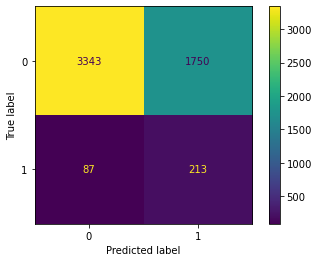

Before threshold adjustment:
[[3343 1750]
 [  87  213]]


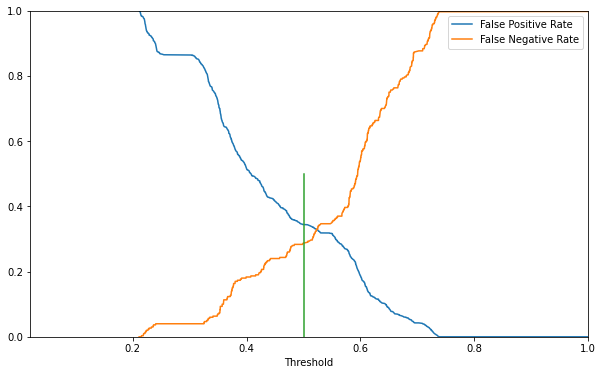


After threshold adjustment with threshold = >>0.47<<
[[3124 1969]
 [  75  225]]


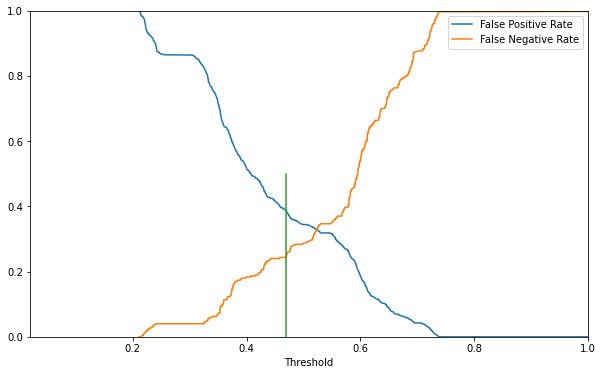

In [504]:
X_test, y_test, classification, y_train_sampled_pred, y_train_sampled_pred_df, y_test_pred, probability, y_test_pred_df,model=quickie(df_final3,"offer_accepted_Yes",model=(RandomForestClassifier(n_estimators=100,max_depth=12, min_samples_split=2000, min_samples_leaf=1000)))
conf23=confusion_matrix(y_test, y_test_pred_df)

test=y_test
test_pred=y_test_pred
probs=probability

adjust_threshold(test,test_pred, probs, threshold = 0.47)

In [505]:
threshold, check = fn_terminator(y_test, y_test_pred, probability)

Before threshold adjustment:
[[3124 1969]
 [  75  225]]

After threshold adjustment with threshold = >>0.21<<
[[   0 5093]
 [   0  300]]

By eliminating the false negatives, the false positives increase by 3124!!!


### 5.3.1 df_final, scaler=StandardScaler(), model=AdaBoostClassifier()

Before sampling:
Length X:  12583
Length Y:  12583
_______________
offer_accepted_Yes
0                     11862
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11475
1                       721
dtype: int64
12196
Before sampling:
Length X:  12196
Length Y:  12196
_______________
offer_accepted_Yes
0                     11475
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11475
1                     11475
dtype: int64
22950
AdaBoostClassifier()
The accuracy of the model in the TRAIN set is:  0.88
The kappa of the model in the TRAIN set is:  0.7501525054466232
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     11475
           1       0.88      0.86      0.87     11475

    accuracy                           0.88     22950
   macro avg 

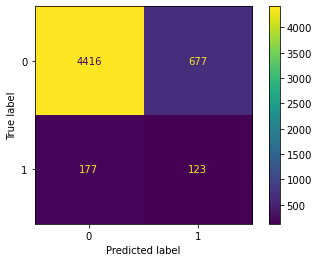

Before threshold adjustment:
[[4416  677]
 [ 177  123]]


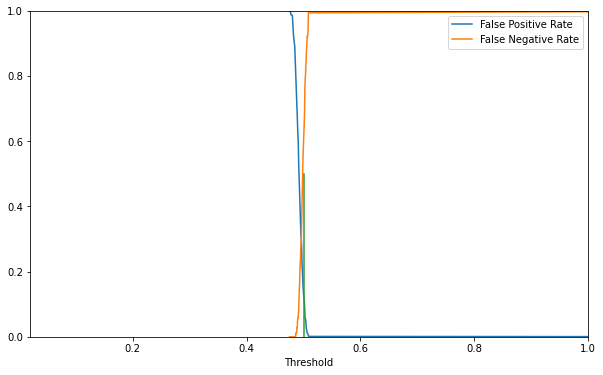


After threshold adjustment with threshold = >>0.5<<
[[4416  677]
 [ 177  123]]


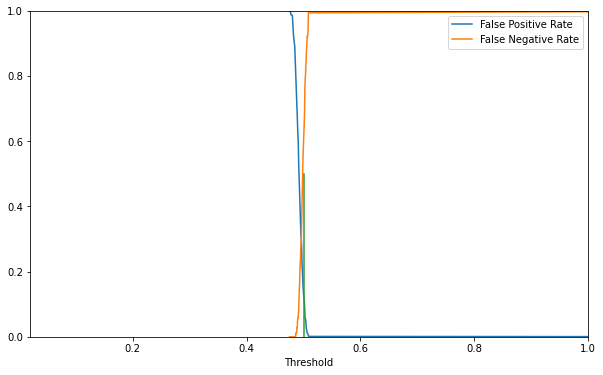

In [506]:
X_test, y_test, classification, y_train_sampled_pred, y_train_sampled_pred_df, y_test_pred, probability, y_test_pred_df,model=quickie(df_final,"offer_accepted_Yes")
conf31=confusion_matrix(y_test, y_test_pred_df)

test=y_test
test_pred=y_test_pred
probs=probability

adjust_threshold(test,test_pred, probs, threshold = 0.5)

In [507]:
threshold, check = fn_terminator(y_test, y_test_pred, probability)

Before threshold adjustment:
[[4416  677]
 [ 177  123]]

After threshold adjustment with threshold = >>0.48<<
[[  74 5019]
 [   0  300]]

By eliminating the false negatives, the false positives increase by 4342!!!


### 5.3.2 df_final2, scaler=StandardScaler(), model=AdaBoostClassifier()

Before sampling:
Length X:  12583
Length Y:  12583
_______________
offer_accepted_Yes
0                     11862
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11444
1                       721
dtype: int64
12165
Before sampling:
Length X:  12165
Length Y:  12165
_______________
offer_accepted_Yes
0                     11444
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11444
1                     11444
dtype: int64
22888
AdaBoostClassifier()
The accuracy of the model in the TRAIN set is:  0.77
The kappa of the model in the TRAIN set is:  0.5484096469765816
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     11444
           1       0.76      0.80      0.78     11444

    accuracy                           0.77     22888
   macro avg 

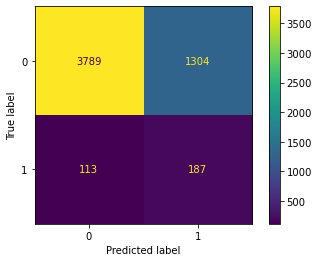

Before threshold adjustment:
[[3789 1304]
 [ 113  187]]


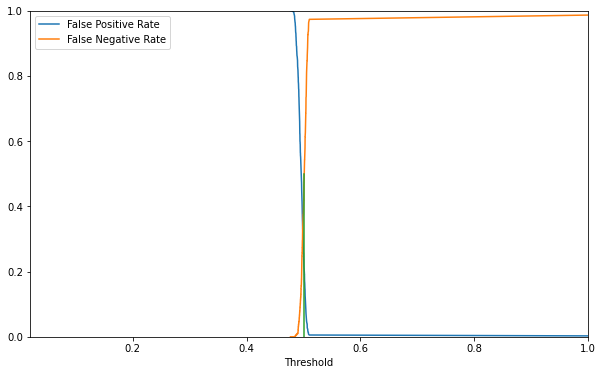


After threshold adjustment with threshold = >>0.5<<
[[3789 1304]
 [ 113  187]]


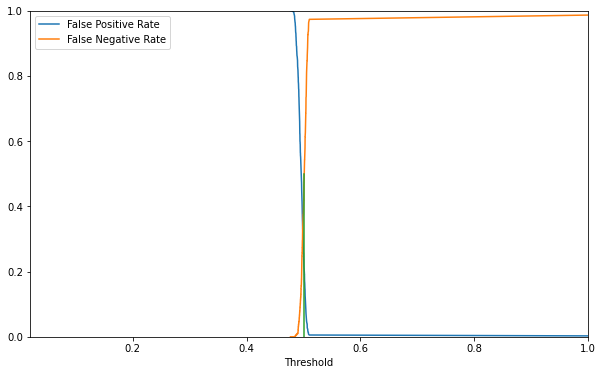

In [508]:
X_test, y_test, classification, y_train_sampled_pred, y_train_sampled_pred_df, y_test_pred, probability, y_test_pred_df,model=quickie(df_final2,"offer_accepted_Yes")
conf32=confusion_matrix(y_test, y_test_pred_df)

test=y_test
test_pred=y_test_pred
probs=probability

adjust_threshold(test,test_pred, probs, threshold = 0.5)

In [509]:
threshold, check = fn_terminator(y_test, y_test_pred, probability)

Before threshold adjustment:
[[3789 1304]
 [ 113  187]]

After threshold adjustment with threshold = >>0.48<<
[[   3 5090]
 [   0  300]]

By eliminating the false negatives, the false positives increase by 3786!!!


### 5.3.3 df_final3, scaler=StandardScaler(), model=AdaBoostClassifier()

Before sampling:
Length X:  12583
Length Y:  12583
_______________
offer_accepted_Yes
0                     11862
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11437
1                       721
dtype: int64
12158
Before sampling:
Length X:  12158
Length Y:  12158
_______________
offer_accepted_Yes
0                     11437
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11437
1                     11437
dtype: int64
22874
AdaBoostClassifier()
The accuracy of the model in the TRAIN set is:  0.73
The kappa of the model in the TRAIN set is:  0.45440237824604357
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.75      0.68      0.71     11437
           1       0.71      0.77      0.74     11437

    accuracy                           0.73     22874
   macro avg

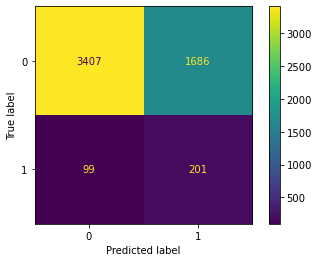

Before threshold adjustment:
[[3407 1686]
 [  99  201]]


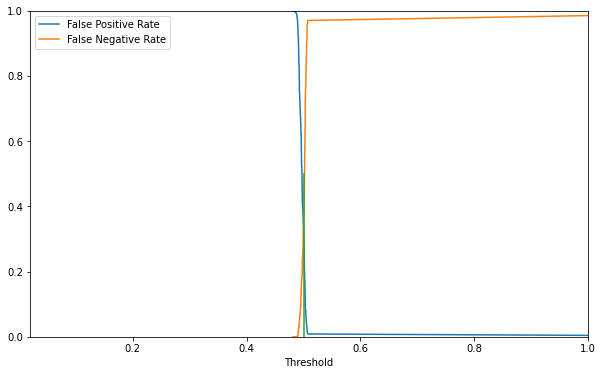


After threshold adjustment with threshold = >>0.5<<
[[3407 1686]
 [  99  201]]


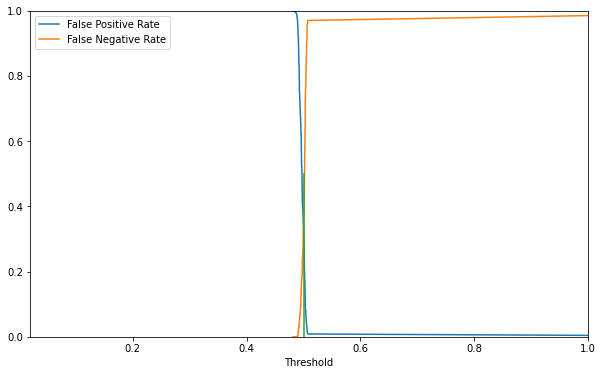

In [510]:
X_test, y_test, classification, y_train_sampled_pred, y_train_sampled_pred_df, y_test_pred, probability, y_test_pred_df,model=quickie(df_final3,"offer_accepted_Yes")
conf33=confusion_matrix(y_test, y_test_pred_df)

test=y_test
test_pred=y_test_pred
probs=probability

adjust_threshold(test,test_pred, probs, threshold = 0.5)

In [511]:
threshold, check = fn_terminator(y_test, y_test_pred, probability)

Before threshold adjustment:
[[3407 1686]
 [  99  201]]

After threshold adjustment with threshold = >>0.48<<
[[   0 5093]
 [   0  300]]

By eliminating the false negatives, the false positives increase by 3407!!!


### 5.4.1 df_final, scaler=StandardScaler(), model=(KNeighborsClassifier(n_neighbors= 5))

Before sampling:
Length X:  12583
Length Y:  12583
_______________
offer_accepted_Yes
0                     11862
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11475
1                       721
dtype: int64
12196
Before sampling:
Length X:  12196
Length Y:  12196
_______________
offer_accepted_Yes
0                     11475
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11475
1                     11475
dtype: int64
22950
KNeighborsClassifier()
The accuracy of the model in the TRAIN set is:  0.94
The kappa of the model in the TRAIN set is:  0.8811328976034858
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     11475
           1       0.90      0.99      0.94     11475

    accuracy                           0.94     22950
   macro av

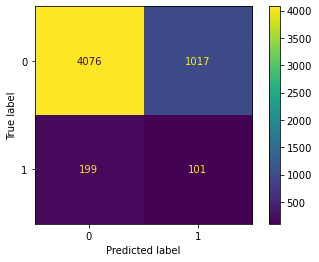

Before threshold adjustment:
[[4076 1017]
 [ 199  101]]


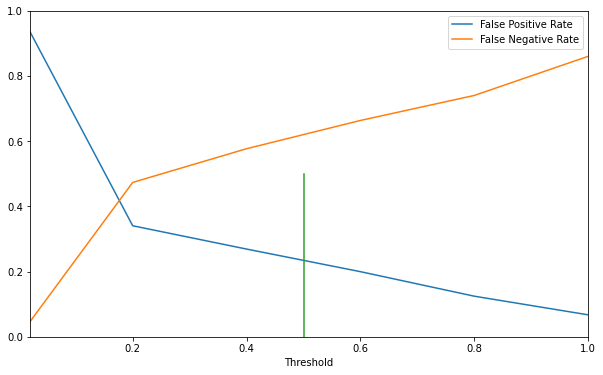


After threshold adjustment with threshold = >>0.5<<
[[4076 1017]
 [ 199  101]]


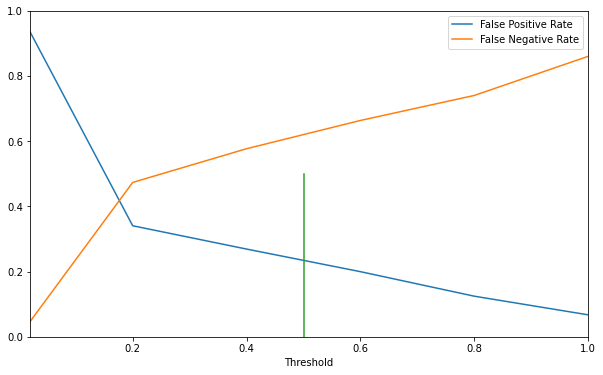

In [517]:
X_test, y_test, classification, y_train_sampled_pred, y_train_sampled_pred_df, y_test_pred, probability, y_test_pred_df,model=quickie(df_final,"offer_accepted_Yes",model=(KNeighborsClassifier(n_neighbors= 5)))
conf41=confusion_matrix(y_test, y_test_pred_df)

test=y_test
test_pred=y_test_pred
probs=probability

adjust_threshold(test,test_pred, probs, threshold = 0.5)

In [518]:
threshold, check = fn_terminator(y_test, y_test_pred, probability)

Before threshold adjustment:
[[4076 1017]
 [ 199  101]]

After threshold adjustment with threshold = >>-0.0<<
[[   0 5093]
 [   0  300]]

By eliminating the false negatives, the false positives increase by 4076!!!


### 5.4.2 df_final2, scaler=StandardScaler(), model=(KNeighborsClassifier(n_neighbors= 5))

Before sampling:
Length X:  12583
Length Y:  12583
_______________
offer_accepted_Yes
0                     11862
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11444
1                       721
dtype: int64
12165
Before sampling:
Length X:  12165
Length Y:  12165
_______________
offer_accepted_Yes
0                     11444
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11444
1                     11444
dtype: int64
22888
KNeighborsClassifier()
The accuracy of the model in the TRAIN set is:  0.9
The kappa of the model in the TRAIN set is:  0.7977979727368053
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     11444
           1       0.88      0.92      0.90     11444

    accuracy                           0.90     22888
   macro avg

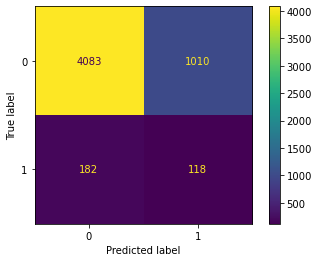

Before threshold adjustment:
[[4083 1010]
 [ 182  118]]


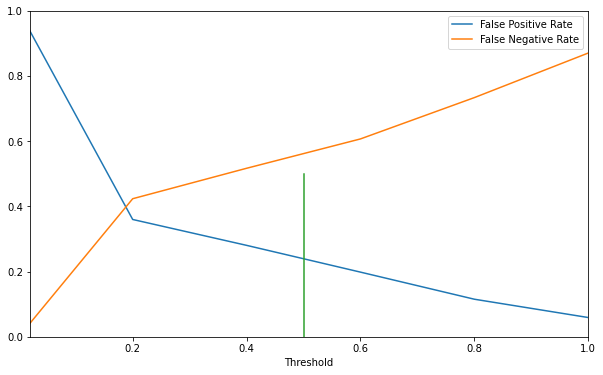


After threshold adjustment with threshold = >>0.5<<
[[4083 1010]
 [ 182  118]]


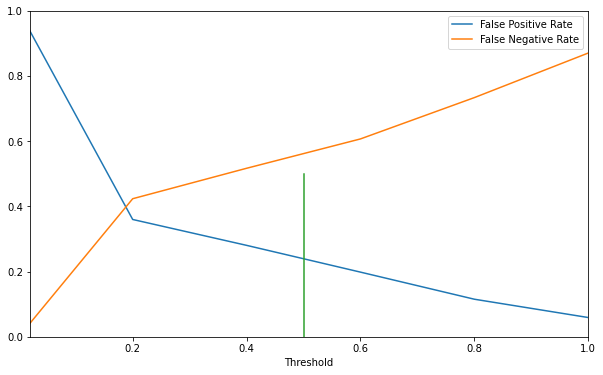

In [522]:
X_test, y_test, classification, y_train_sampled_pred, y_train_sampled_pred_df, y_test_pred, probability, y_test_pred_df,model=quickie(df_final2,"offer_accepted_Yes",model=(KNeighborsClassifier(n_neighbors= 5)))
conf42=confusion_matrix(y_test, y_test_pred_df)

test=y_test
test_pred=y_test_pred
probs=probability

adjust_threshold(test,test_pred, probs, threshold = 0.5)

In [523]:
threshold, check = fn_terminator(y_test, y_test_pred, probability)

Before threshold adjustment:
[[4083 1010]
 [ 182  118]]

After threshold adjustment with threshold = >>-0.0<<
[[   0 5093]
 [   0  300]]

By eliminating the false negatives, the false positives increase by 4083!!!


### 5.4.3 df_final3, scaler=StandardScaler(), model=(KNeighborsClassifier(n_neighbors= 5))

Before sampling:
Length X:  12583
Length Y:  12583
_______________
offer_accepted_Yes
0                     11862
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11437
1                       721
dtype: int64
12158
Before sampling:
Length X:  12158
Length Y:  12158
_______________
offer_accepted_Yes
0                     11437
1                       721
dtype: int64
_______________
After sampling:
offer_accepted_Yes
0                     11437
1                     11437
dtype: int64
22874
KNeighborsClassifier()
The accuracy of the model in the TRAIN set is:  0.87
The kappa of the model in the TRAIN set is:  0.733146804231879
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     11437
           1       0.86      0.88      0.87     11437

    accuracy                           0.87     22874
   macro avg

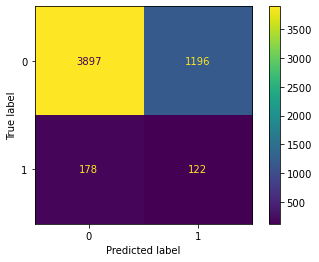

Before threshold adjustment:
[[3897 1196]
 [ 178  122]]


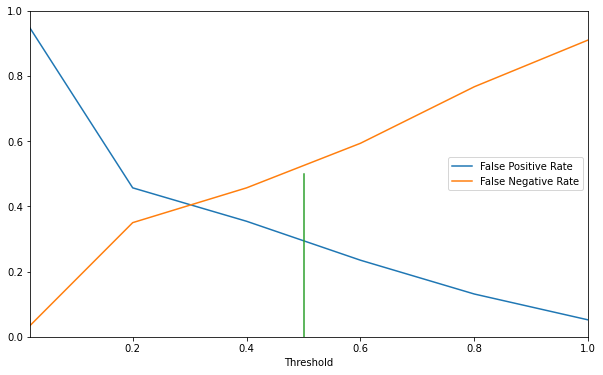


After threshold adjustment with threshold = >>0.5<<
[[3897 1196]
 [ 178  122]]


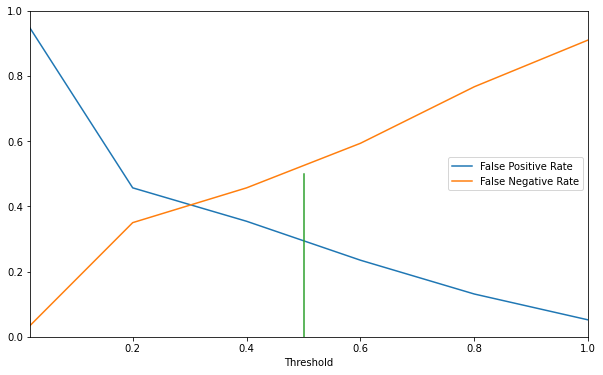

In [524]:
X_test, y_test, classification, y_train_sampled_pred, y_train_sampled_pred_df, y_test_pred, probability, y_test_pred_df,model=quickie(df_final3,"offer_accepted_Yes",model=(KNeighborsClassifier(n_neighbors= 5)))
conf43=confusion_matrix(y_test, y_test_pred_df)

test=y_test
test_pred=y_test_pred
probs=probability

adjust_threshold(test,test_pred, probs, threshold = 0.5)

In [525]:
threshold, check = fn_terminator(y_test, y_test_pred, probability)

Before threshold adjustment:
[[3897 1196]
 [ 178  122]]

After threshold adjustment with threshold = >>-0.0<<
[[   0 5093]
 [   0  300]]

By eliminating the false negatives, the false positives increase by 3897!!!


# 5.5 Results

In [526]:
print("df_final/LOG")
print(conf11)
print("df_final/LOG")
print(conf12)
print("df_final/LOG")
print(conf13)
print("_____________________")
print("df_final/RANDOM")
print(conf21)
print("df_final/Random")
print(conf22)
print("df_final/RANDOM")
print(conf23)
print("_____________________")
print("df_final/ADA")
print(conf31)
print("df_final/ADA")
print(conf32)
print("df_final/ADA")
print(conf33)
print("_____________________")
print("df_final/KNN")
print(conf41)
print("df_final/KNN")
print(conf42)
print("df_final/KNN")
print(conf43)

df_final/LOG
[[3360 1733]
 [  76  224]]
df_final/LOG
[[3200 1893]
 [  77  223]]
df_final/LOG
[[3066 2027]
 [  73  227]]
_____________________
df_final/RANDOM
[[3906 1187]
 [ 123  177]]
df_final/Random
[[3680 1413]
 [ 109  191]]
df_final/RANDOM
[[3343 1750]
 [  87  213]]
_____________________
df_final/ADA
[[4416  677]
 [ 177  123]]
df_final/ADA
[[3789 1304]
 [ 113  187]]
df_final/ADA
[[3407 1686]
 [  99  201]]
_____________________
df_final/KNN
[[4076 1017]
 [ 199  101]]
df_final/KNN
[[4083 1010]
 [ 182  118]]
df_final/KNN
[[3897 1196]
 [ 178  122]]


# 5.6 Exploring false-negative

In [457]:
#df with x_test, y_test & y_test_pred
df_test= pd.concat([X_test, y_test, y_test_pred_df],axis=1)

#Creating df false negative
df_test2=df_test[(df_test.offer_accepted_Yes==1) & (df_test.offer_accepted_Yes_pred==0)]
index=list(df_test2.index)
false_negative=df_test[df_test.index.isin(index)]

In [458]:
#for df_final2

false_negative

,n_credit_cards_held,household_size,average_balance,income_level,credit_rating,offer_accepted_Yes,offer_accepted_Yes_pred
customer_id,,,,,,,
2633,2,3,1193.50,2,3,1,0
12520,1,3,866.50,2,3,1,0
17600,1,5,1329.50,2,1,1,0
11222,2,2,1344.75,1,3,1,0
8689,2,4,745.50,2,2,1,0
...,...,...,...,...,...,...,...
51,2,2,931.75,1,3,1,0
3667,2,2,1763.00,3,1,1,0
4321,2,5,1203.00,1,3,1,0


In [272]:
fn_categoricals,fn_discrete,fn_continuous=converter(false_negative,value=10)


FALSE NEGATIV CATEGORICALS
FALSE NEGATIV DISCRETE


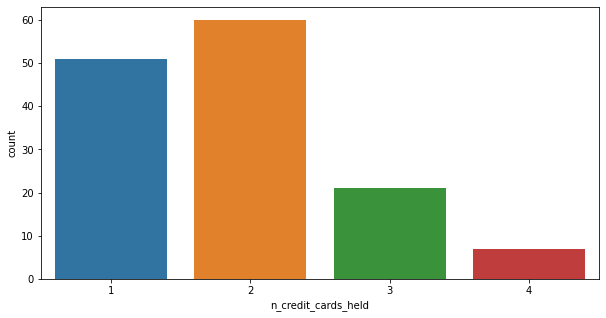

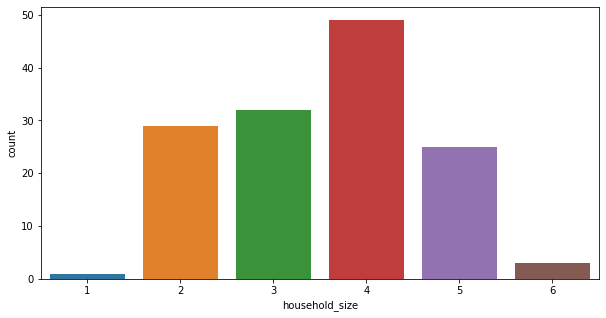

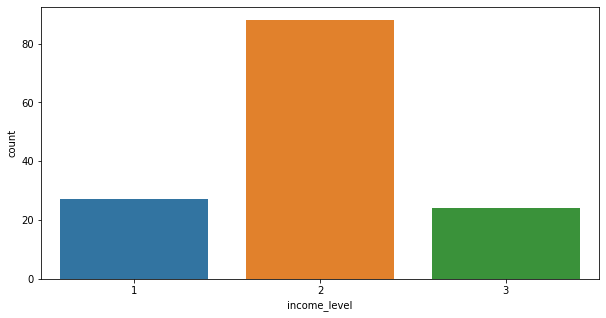

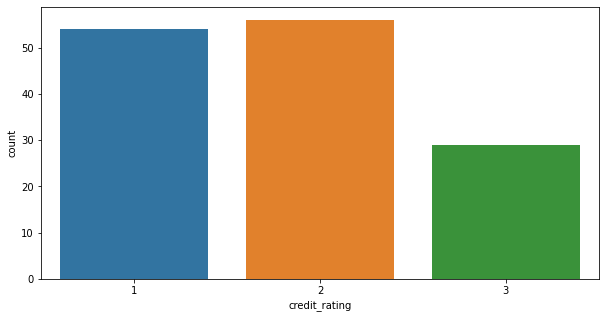

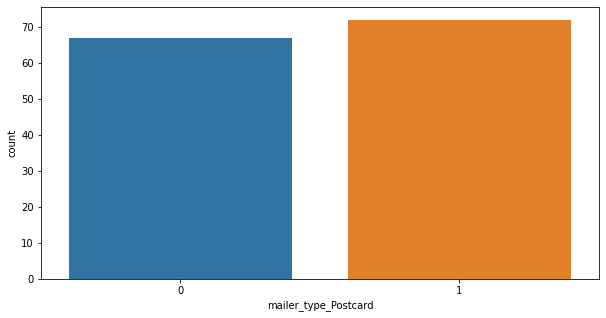

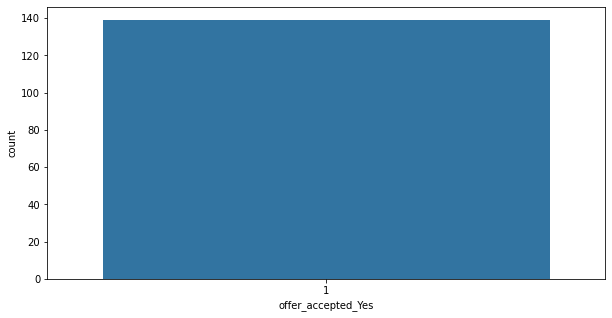

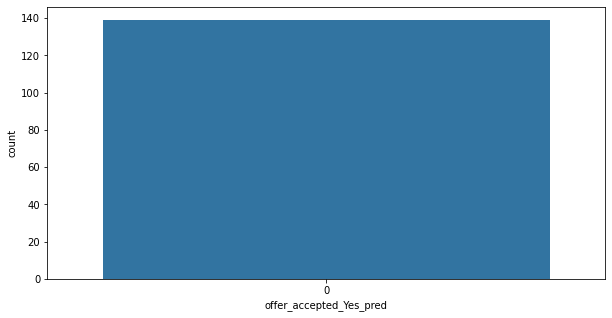

FALSE NEGATIV CONTINUOUS
average_balance


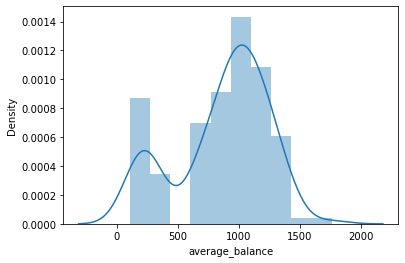

FALSE NEGATIV DISCRETE


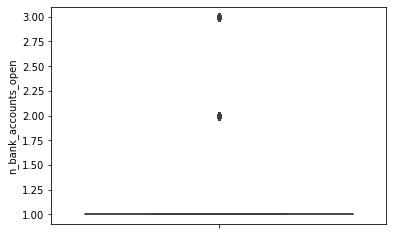

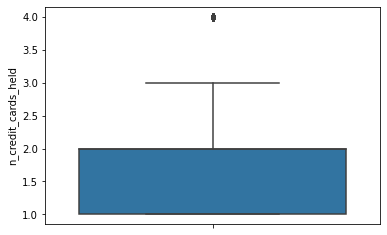

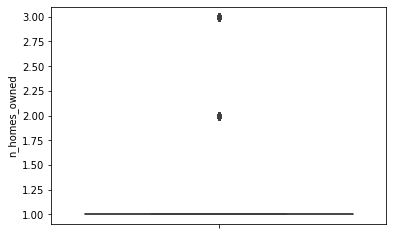

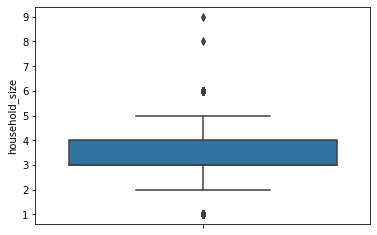

In [273]:
print("FALSE NEGATIV CATEGORICALS")
countplot_df(fn_categoricals)

print("FALSE NEGATIV DISCRETE")
countplot_df(fn_discrete)

print("FALSE NEGATIV CONTINUOUS")
distplot_df(fn_continuous)

print("FALSE NEGATIV DISCRETE")
boxplot_num(discrete)

In [590]:
df2_LOG

,n_credit_cards_held,household_size,average_balance,income_level,credit_rating,mailer_type_Postcard,offer_accepted_Yes,offer_accepted_Yes_pred,probability NO,probability YES,0.38,0.27,0.13
customer_id,,,,,,,,,,,,,
16666,2,3,231.25,3,3,0,0,0,0.906427,0.093573,0,0,0
17663,1,1,1106.50,2,2,0,0,1,0.677052,0.322948,1,1,1
17735,2,4,1206.25,3,3,1,0,1,0.815314,0.184686,1,1,1
11169,1,5,231.25,2,1,1,0,1,0.250671,0.749329,1,1,1
11384,1,3,1180.25,3,2,0,0,1,0.804910,0.195090,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6258,1,3,1293.00,2,3,0,1,1,0.867977,0.132023,1,1,1
8446,2,2,1179.50,3,1,0,0,1,0.591821,0.408179,1,1,1
12571,2,2,1450.25,1,1,1,0,1,0.161192,0.838808,1,1,1


# 5.7 Automated Feature importance for df-test with our predictions
Input: DF from testset combined with the prediction from our modell

In the following we are getting the the predictions for everthing which is predicted as positiv and investigate the false predictions closer . We use the Autofeature function the fidn out the main reason why something is predicted False. The Graphs show the impact of the features on the false predictions.
We then do the same with the negativ predictions.

In [231]:
# Getting values for TP,FN,FP,TN
TP=df_test[(df_test.offer_accepted_Yes==1) & (df_test.offer_accepted_Yes_pred==0)]
FN=df_test[(df_test.offer_accepted_Yes==1) & (df_test.offer_accepted_Yes_pred==1)]
FP=df_test[(df_test.offer_accepted_Yes==0) & (df_test.offer_accepted_Yes_pred==1)]
TN=df_test[(df_test.offer_accepted_Yes==0) & (df_test.offer_accepted_Yes_pred==0)]
# getting dfs for Trues and Falses
trues=pd.concat([TP,FN],axis=0)
false=pd.concat([FP,TN],axis=0)
#getting target and dropping target and the actuell acception
target=trues["offer_accepted_Yes_pred"]
targetF=false["offer_accepted_Yes_pred"]
trues1=trues.drop(["offer_accepted_Yes","offer_accepted_Yes_pred"],axis=1)
false1=false.drop(["offer_accepted_Yes","offer_accepted_Yes_pred"],axis=1)

In [274]:
def df_of_model(X_test, y_test, y_test_pred_df):
    
    df_test= pd.concat([X_test, y_test, y_test_pred_df],axis=1)
    
    # Getting values for TP,FN,FP.TN
    TP=df_test[(df_test.offer_accepted_Yes==1) & (df_test.offer_accepted_Yes_pred==0)]
    FN=df_test[(df_test.offer_accepted_Yes==1) & (df_test.offer_accepted_Yes_pred==1)]
    FP=df_test[(df_test.offer_accepted_Yes==0) & (df_test.offer_accepted_Yes_pred==1)]
    TN=df_test[(df_test.offer_accepted_Yes==0) & (df_test.offer_accepted_Yes_pred==0)]
    # getting dfs for Trues and Falses
    trues=pd.concat([TP,FN],axis=0)
    false=pd.concat([FP,TN],axis=0)
    #getting target and dropping target and the actuell acception
    target=trues["offer_accepted_Yes_pred"]
    targetF=false["offer_accepted_Yes_pred"]
    trues1=trues.drop(["offer_accepted_Yes","offer_accepted_Yes_pred"],axis=1)
    false1=false.drop(["offer_accepted_Yes","offer_accepted_Yes_pred"],axis=1)
    
    return TP,FN,FP,TN, trues, false, target, targetF, trues1, false1

TP,FN,FP,TN, trues, false, target, targetF, trues1, false1=df_of_model(X_test, y_test, y_test_pred_df)

Before sampling:
Length X:  300
Length Y:  300
_______________
offer_accepted_Yes_pred
1                          161
0                          139
dtype: int64
_______________
After sampling:
offer_accepted_Yes_pred
1                          157
0                          139
dtype: int64
296
Before sampling:
Length X:  296
Length Y:  296
_______________
offer_accepted_Yes_pred
1                          157
0                          139
dtype: int64
_______________
After sampling:
offer_accepted_Yes_pred
0                          157
1                          157
dtype: int64
314
Feature: 0, Score: 0.05092
Feature: 1, Score: 0.10388
Feature: 2, Score: 0.19723
Feature: 3, Score: 0.14283
Feature: 4, Score: 0.32725
Feature: 5, Score: 0.17789


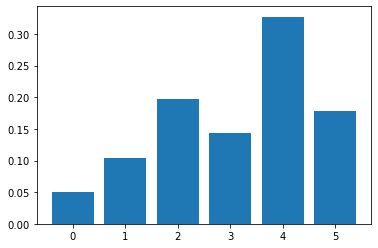

In [275]:
Autofeature(trues1,target,scaler=StandardScaler(), model=RandomForestClassifier())

In [276]:
trues1

,n_credit_cards_held,household_size,average_balance,income_level,credit_rating,mailer_type_Postcard
customer_id,,,,,,
17199,1,4,162.50,1,1,0
2633,2,3,1193.50,2,3,1
4210,3,3,230.25,2,1,0
12520,1,3,866.50,2,3,1
5302,1,3,801.75,1,2,0
...,...,...,...,...,...,...
733,3,4,1246.00,2,1,1
5052,2,3,981.75,1,1,1
16703,1,4,1023.75,1,1,1


 We see that credit rating has the highest impact on the false prediction, since its also a really importend feature for prediction in genral and we cant change it , that doesnt really help us. The most importent feature here is probably mailing type postcard. It seems like that postcard has an impact of the false predictions. Since its easy to change the mailing type to just postcards, we would get rid of this feature and the accuarcy of the modell can be improved. 

Before sampling:
Length X:  5093
Length Y:  5093
_______________
offer_accepted_Yes_pred
0                          3990
1                          1103
dtype: int64
_______________
After sampling:
offer_accepted_Yes_pred
0                          3984
1                          1103
dtype: int64
5087
Before sampling:
Length X:  5087
Length Y:  5087
_______________
offer_accepted_Yes_pred
0                          3984
1                          1103
dtype: int64
_______________
After sampling:
offer_accepted_Yes_pred
0                          3984
1                          3984
dtype: int64
7968
Feature: 0, Score: 0.02254
Feature: 1, Score: 0.07287
Feature: 2, Score: 0.05602
Feature: 3, Score: 0.13973
Feature: 4, Score: 0.57204
Feature: 5, Score: 0.13681


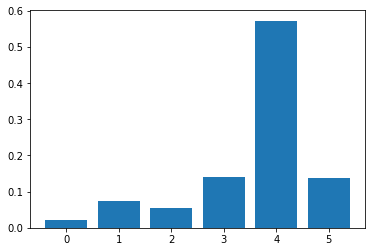

In [277]:
Autofeature(false1,targetF,scaler=StandardScaler(), model=RandomForestClassifier())

In [278]:
false1

,n_credit_cards_held,household_size,average_balance,income_level,credit_rating,mailer_type_Postcard
customer_id,,,,,,
11169,1,5,231.25,2,1,1
2390,2,3,205.25,2,1,1
9627,2,2,1226.00,3,1,1
2372,1,4,878.75,1,1,1
12717,1,4,967.75,1,1,1
...,...,...,...,...,...,...
6557,2,3,1018.50,1,3,0
15674,2,6,768.25,1,3,1
15405,1,5,851.75,2,2,1
